In [54]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, Normalizer, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from scipy.special import boxcox1p
import csv

train_data = pd.read_csv(
    "C:\\Users\\nicke\\Downloads\\house_price_data\\train.csv"
)
test_data = pd.read_csv(
    "C:\\Users\\nicke\\Downloads\\house_price_data\\test.csv"
)
train_data["BuildAge"] = 2025-train_data["YearBuilt"]
train_data["RemodAge"] = 2025-train_data["YearRemodAdd"]
things_to_drop = ["Id", "Street", "Utilities", "OverallQual", "MSZoning", "Condition2", "YearBuilt", 
                  "EnclosedPorch", "BldgType", "RoofStyle", "LandContour", "ExterCond", "BsmtFinType2", 
                  "BedroomAbvGr", "GarageType", "FullBath", "SaleType", "Fence", "BsmtFinSF2", "BsmtCond", 
                  "Alley", "SaleCondition", "YearRemodAdd", "RoofMatl", "BsmtCond", "BsmtFinSF2", "Heating", 
                  "LowQualFinSF", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "Functional", "Exterior2nd"]
train_data = train_data.drop(things_to_drop, axis=1)
print("done")


print("a" if "SalePrice" in train_data.columns else "b")


done
a


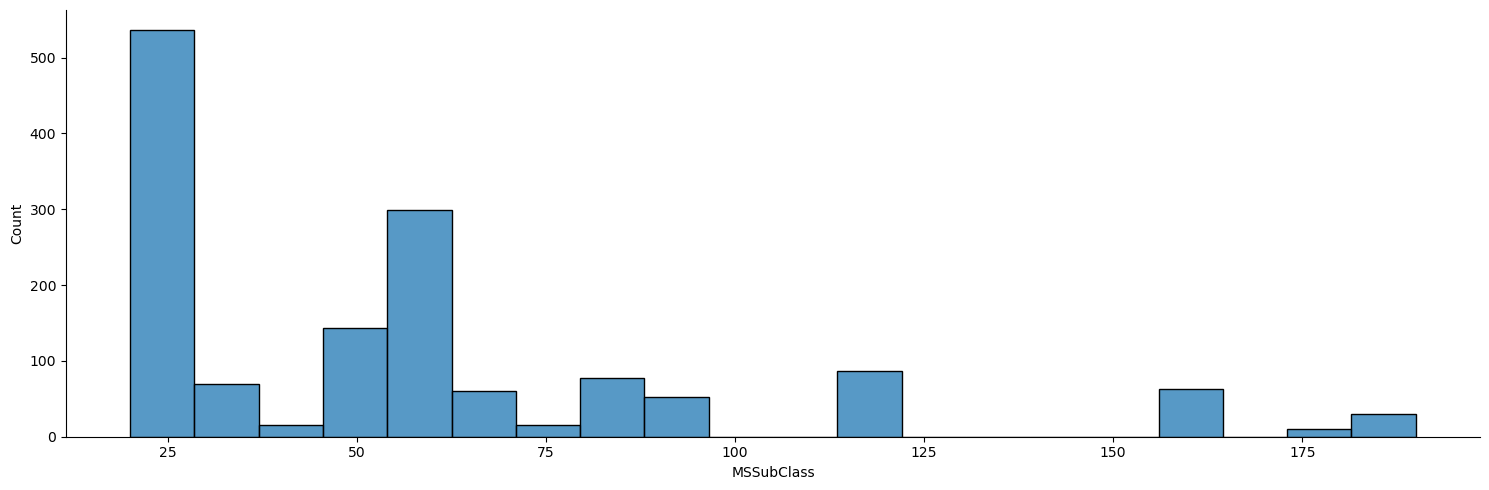

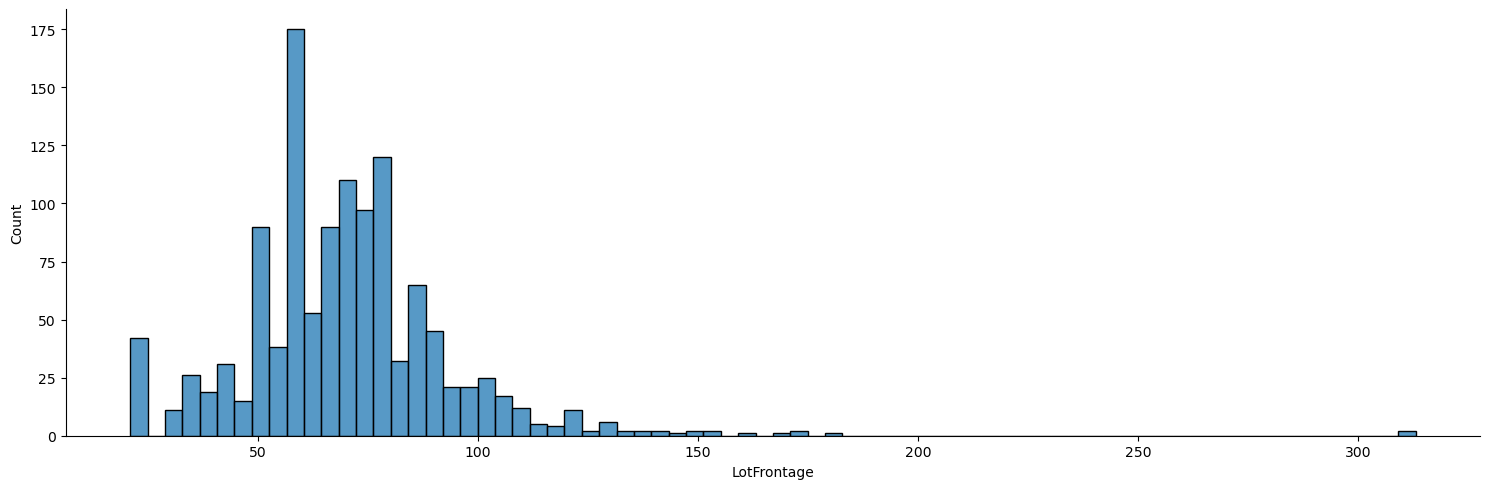

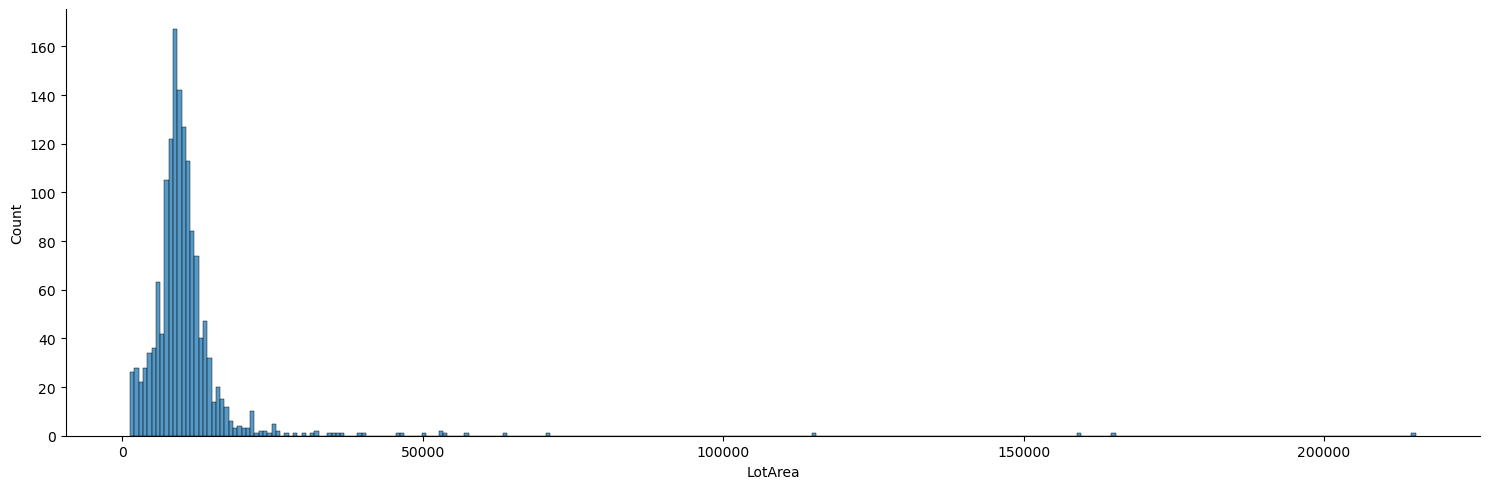

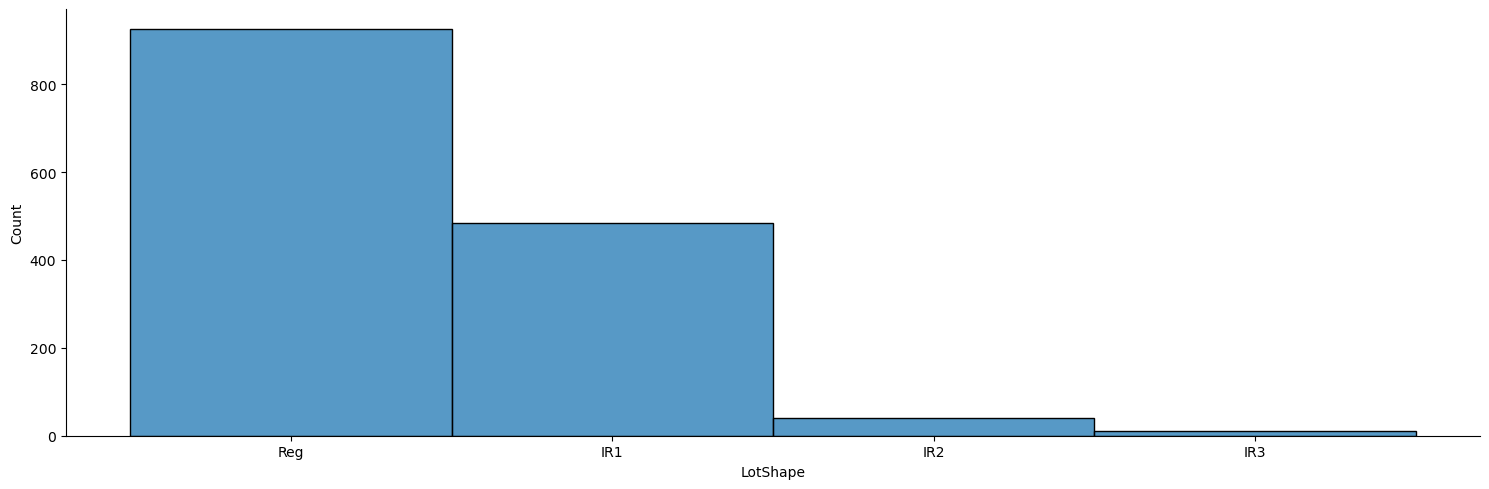

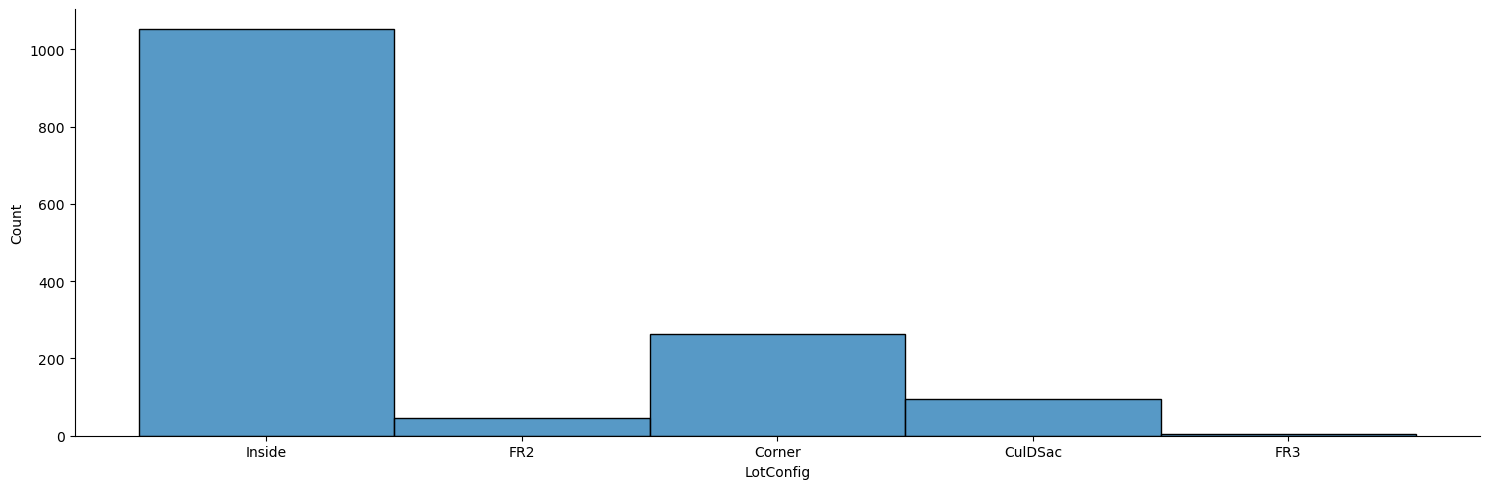

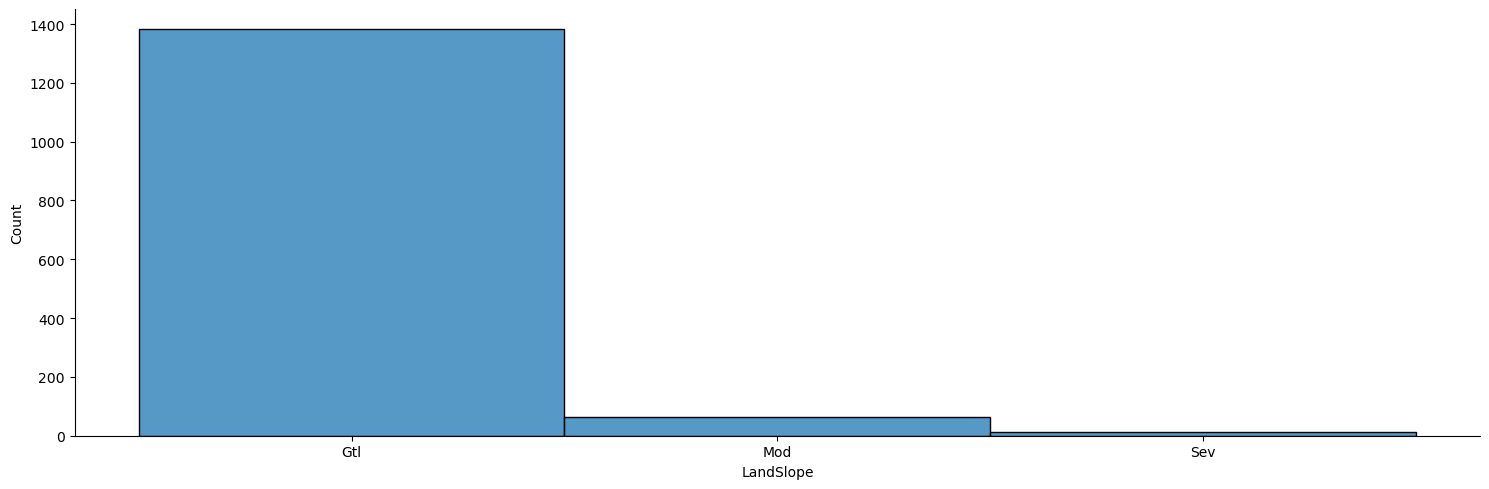

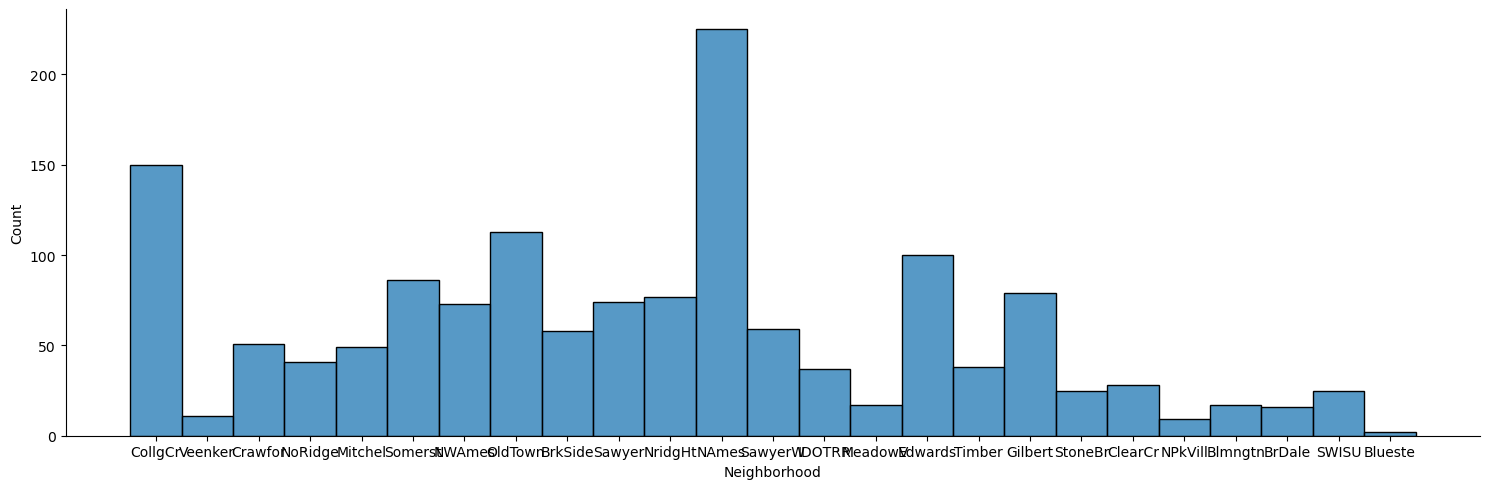

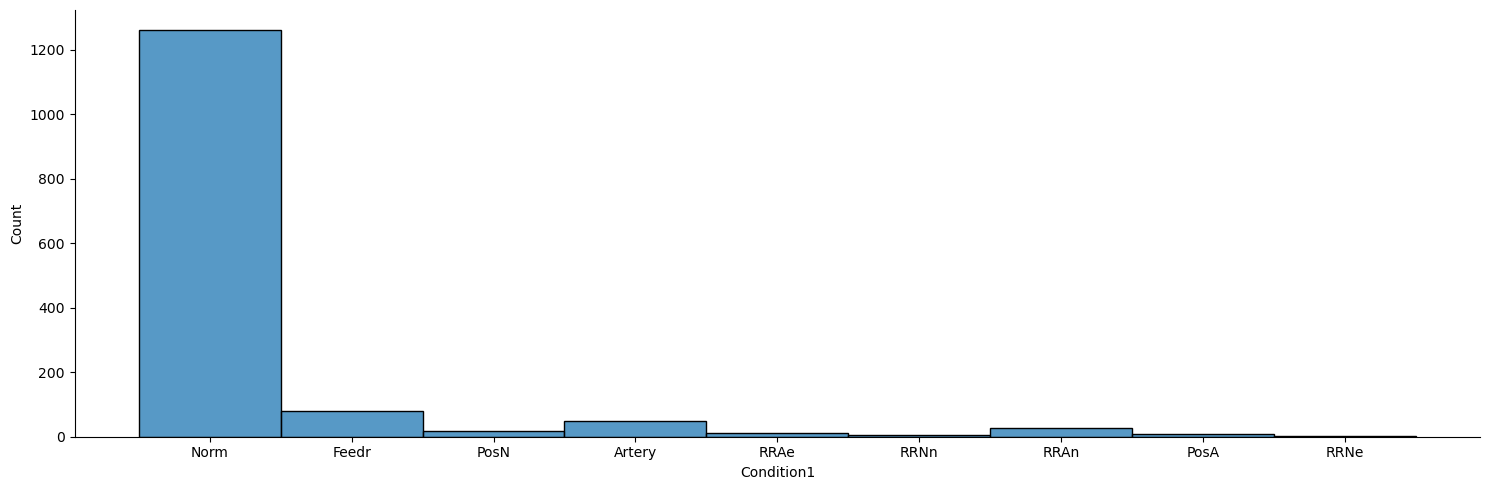

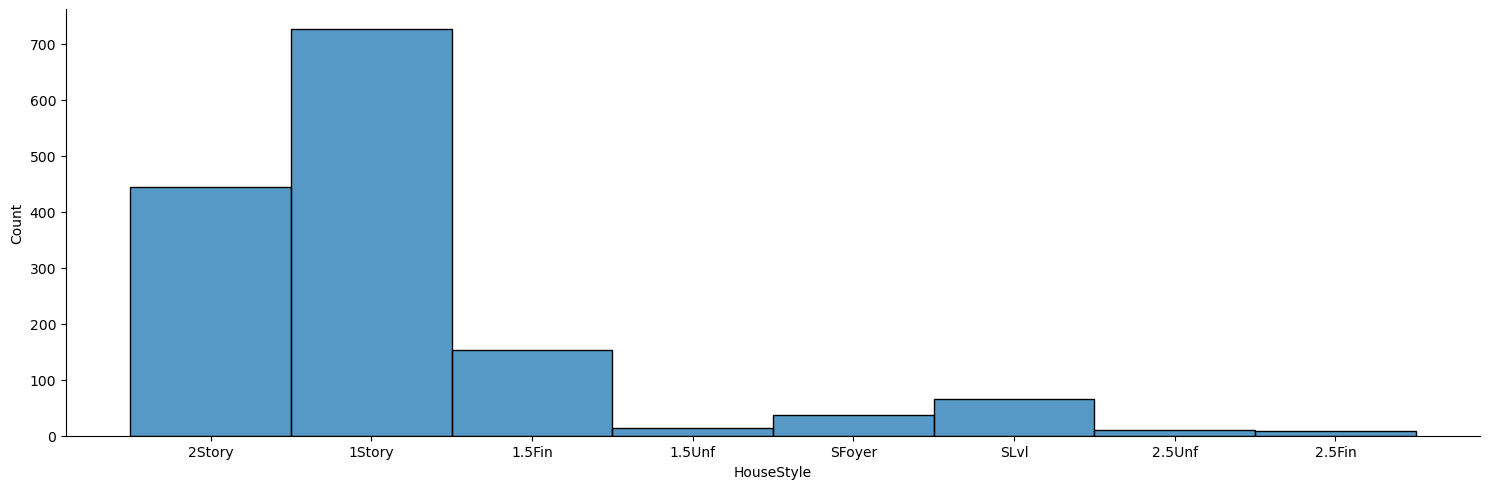

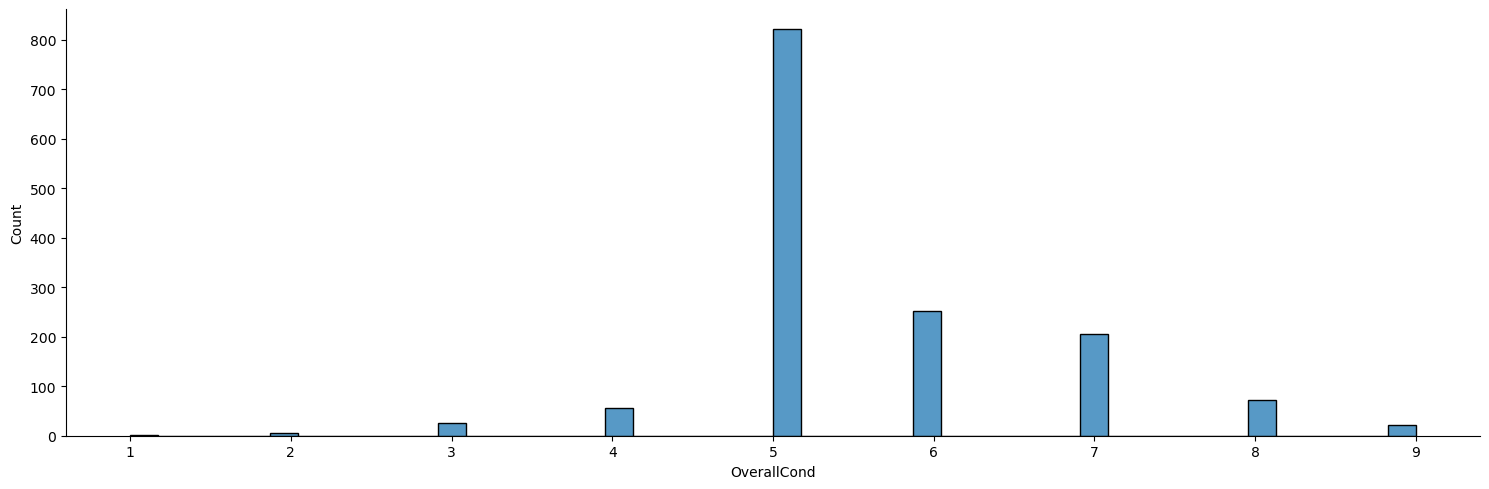

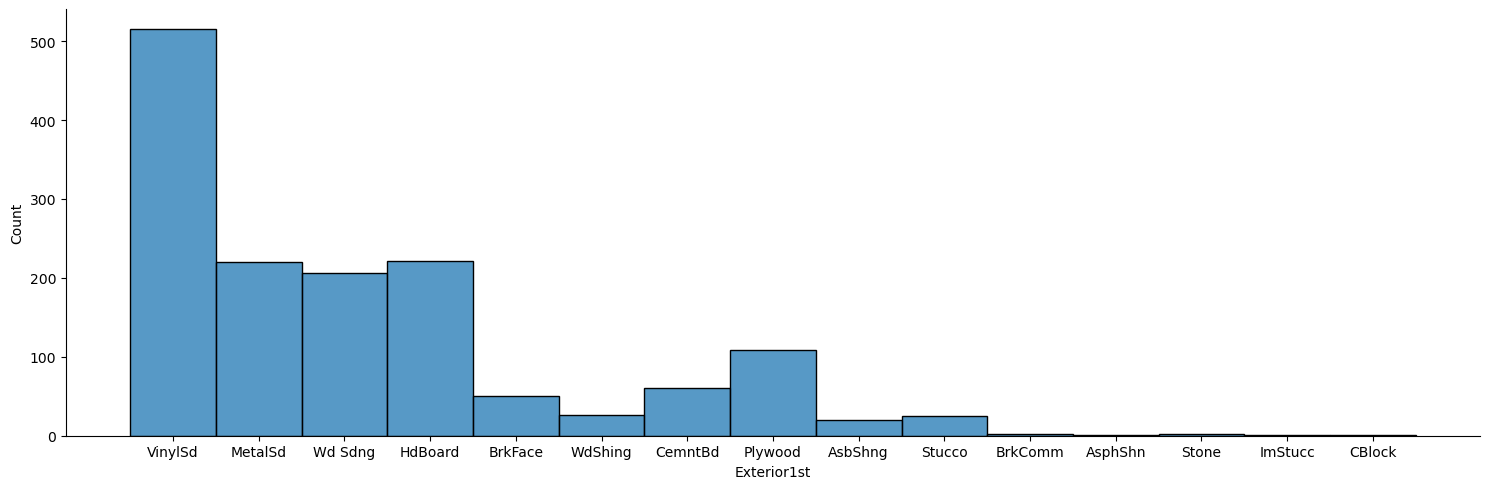

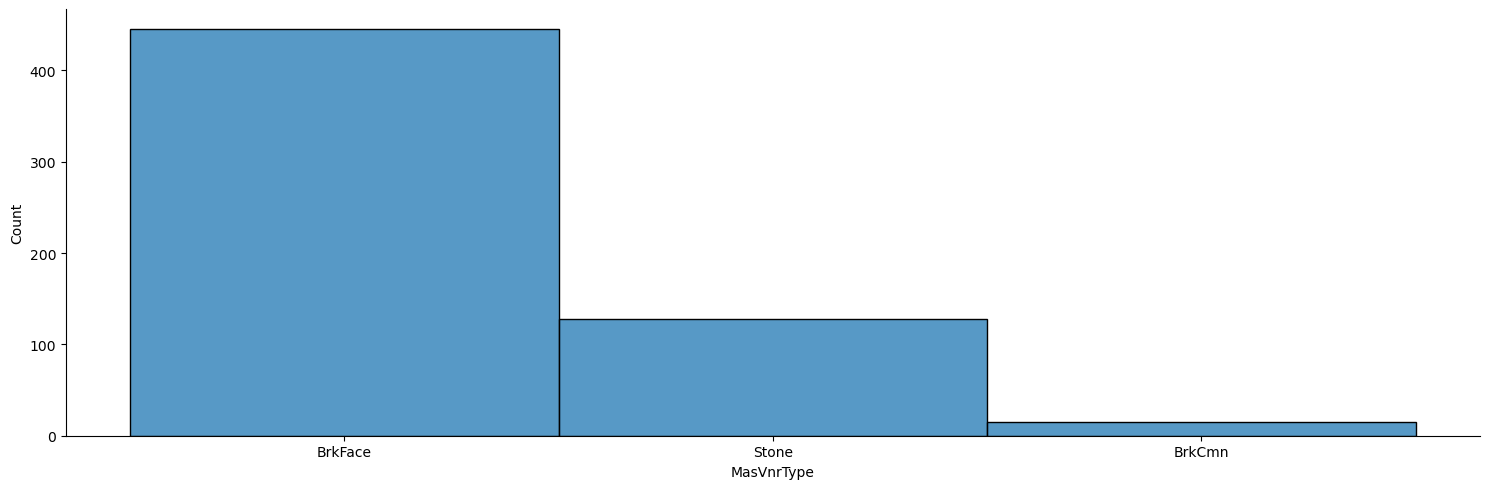

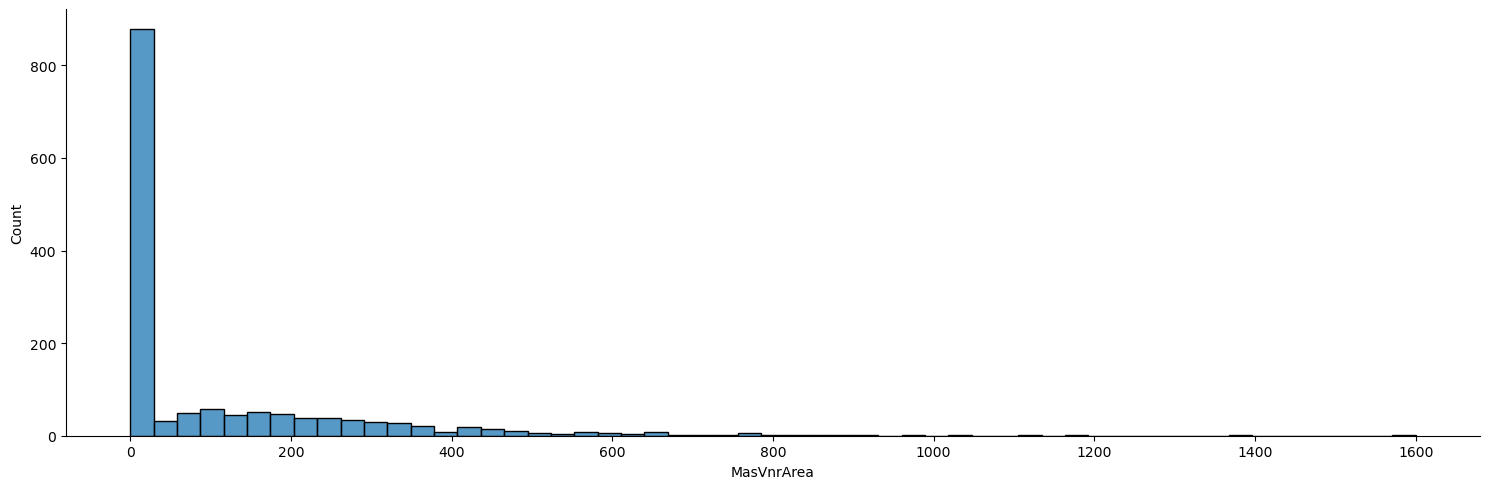

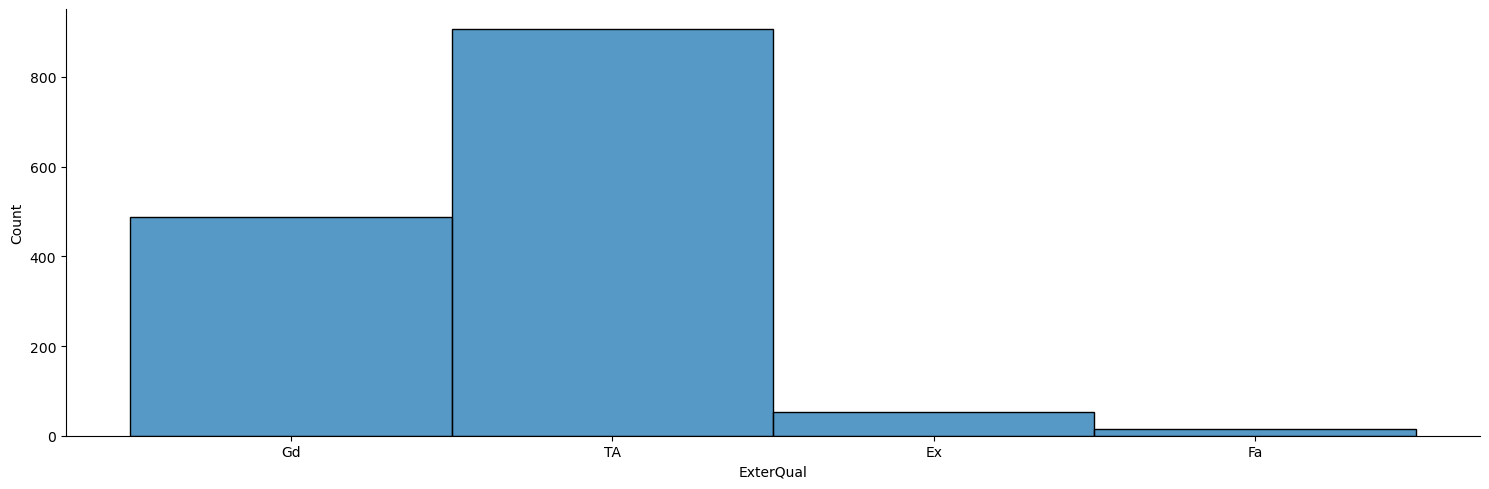

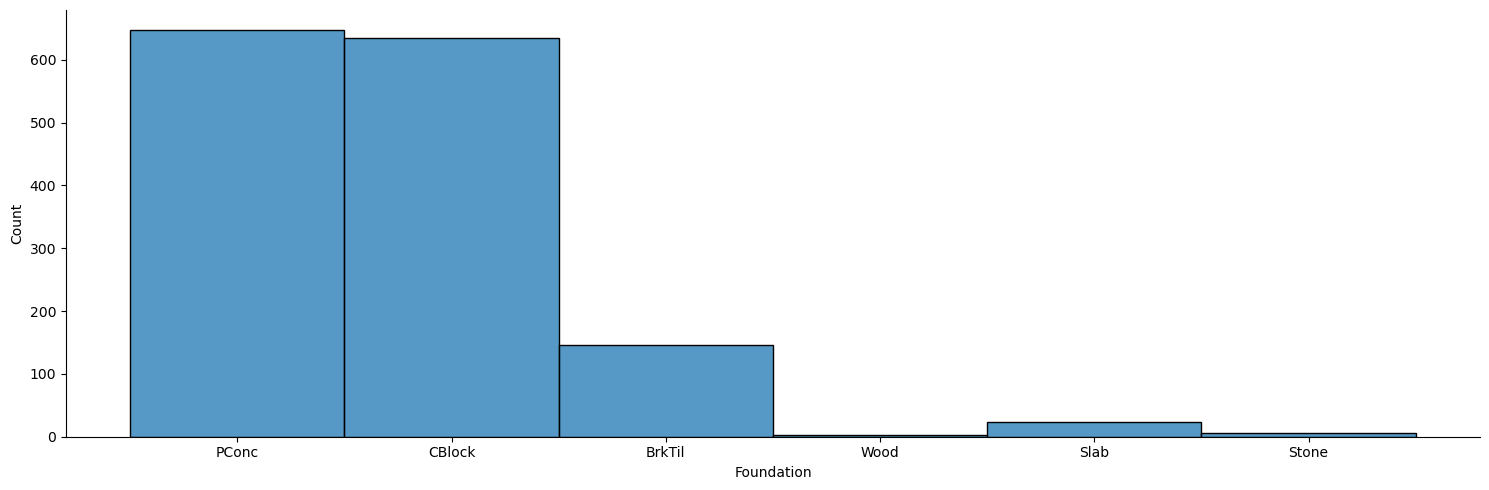

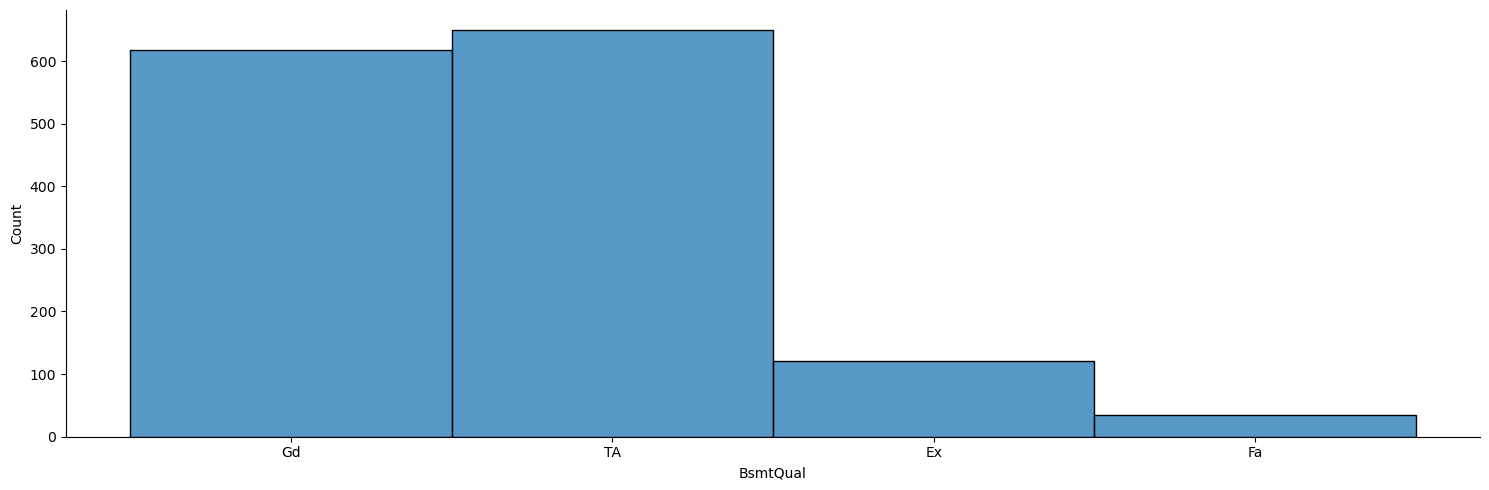

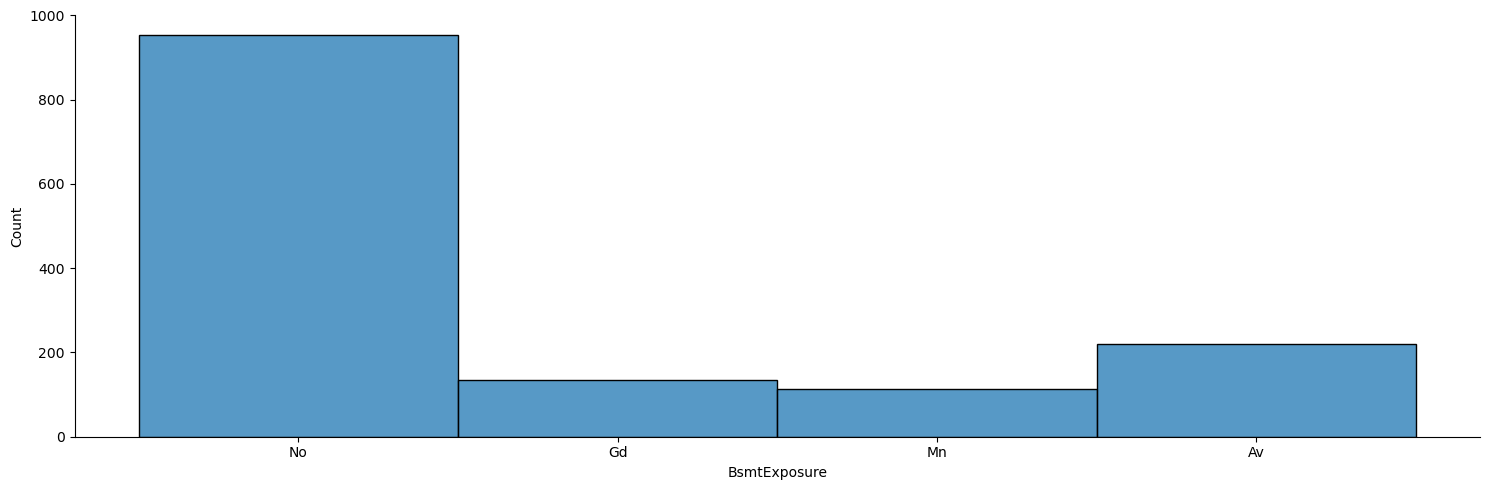

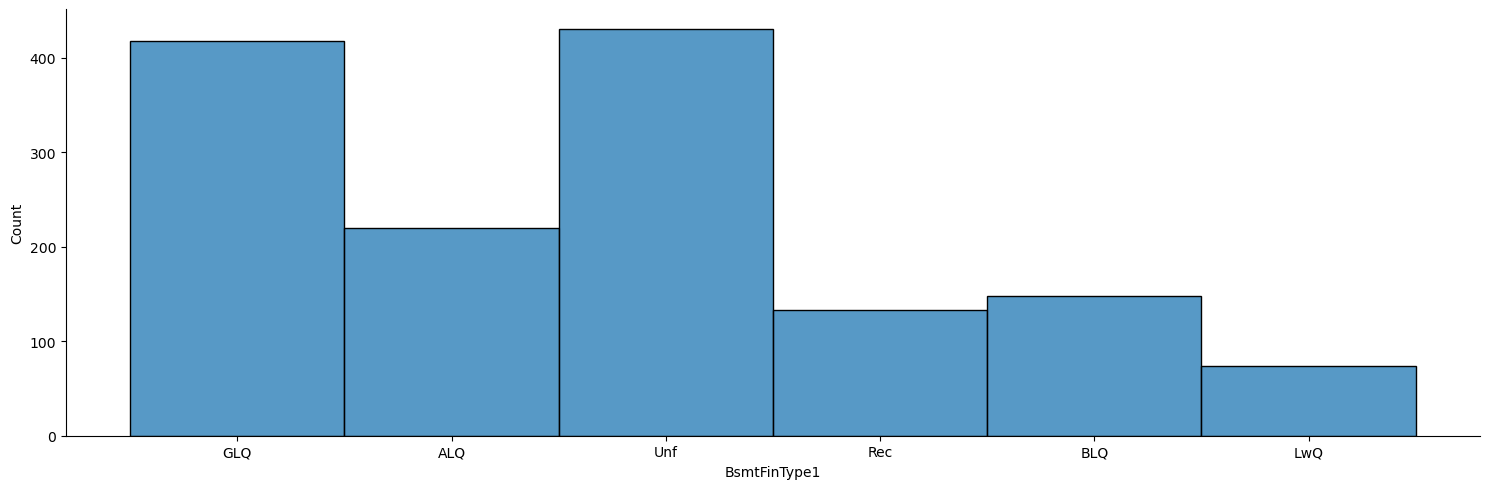

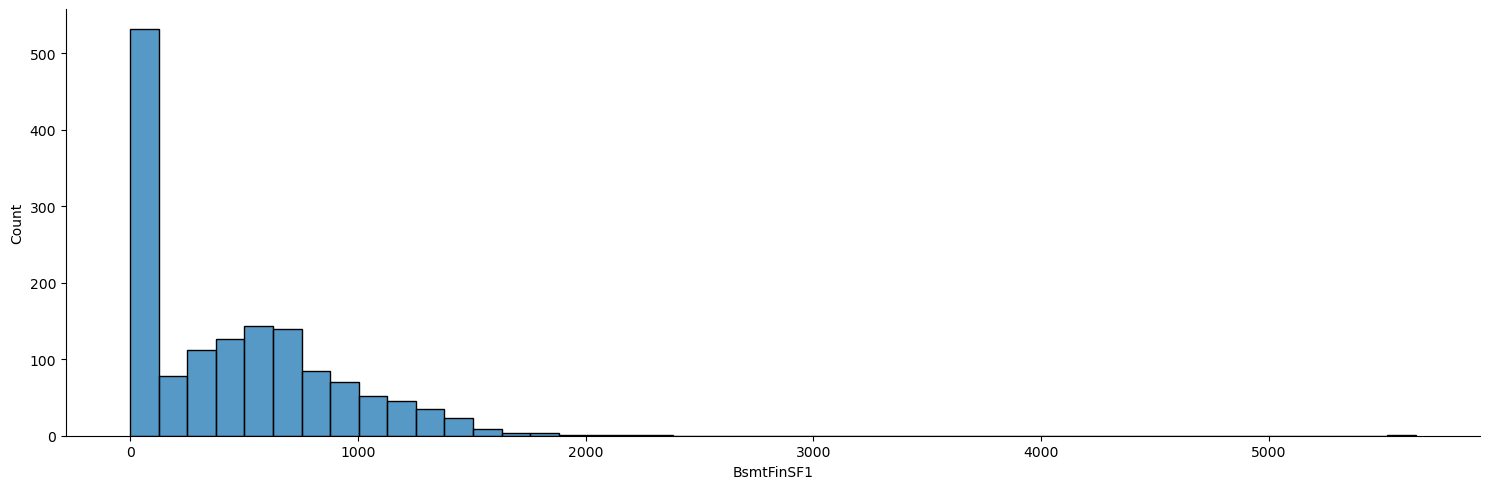

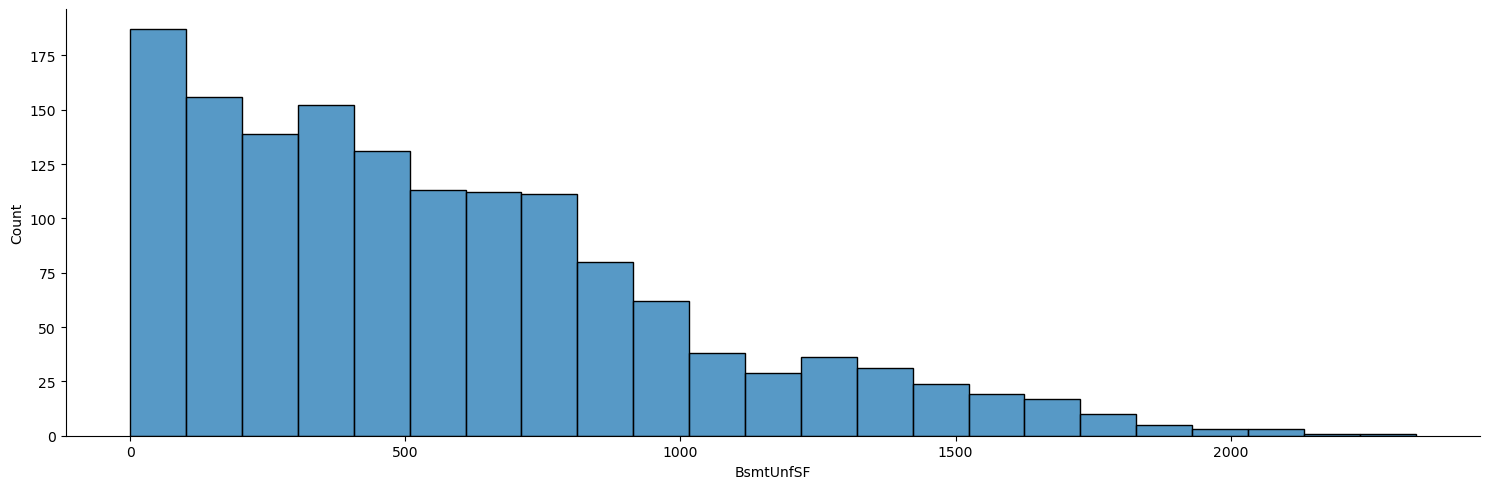

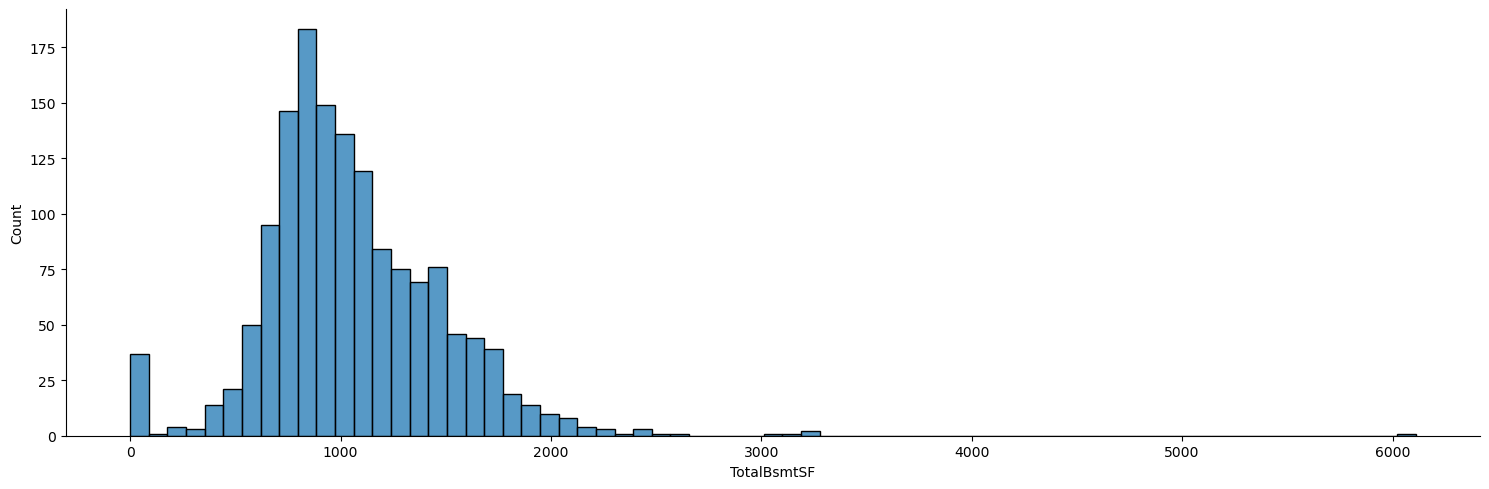

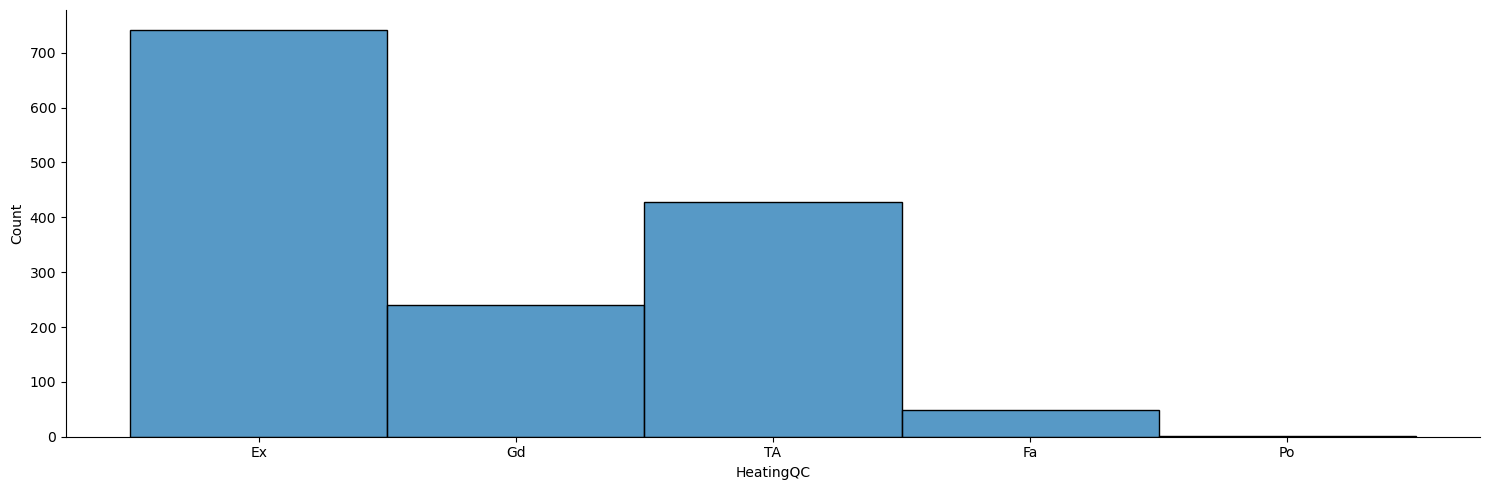

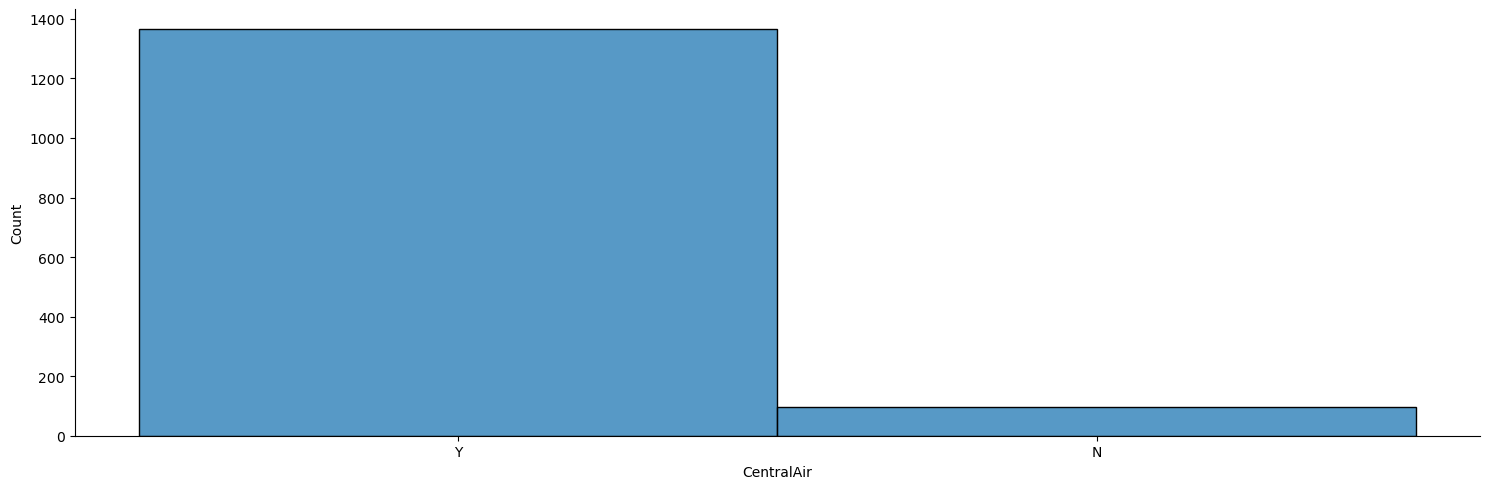

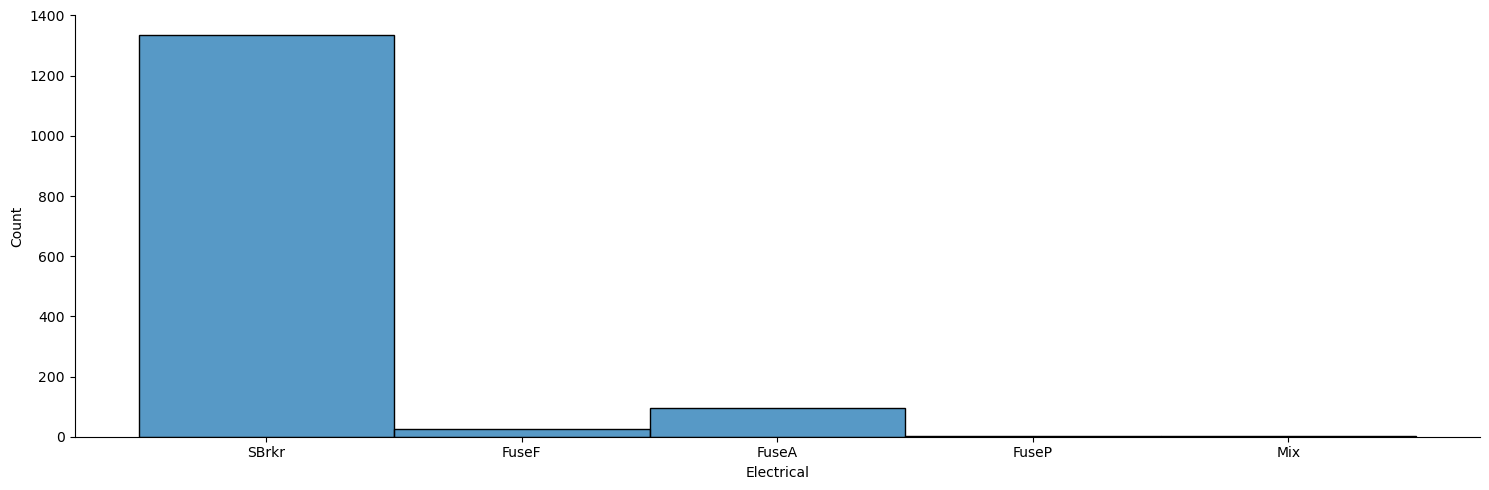

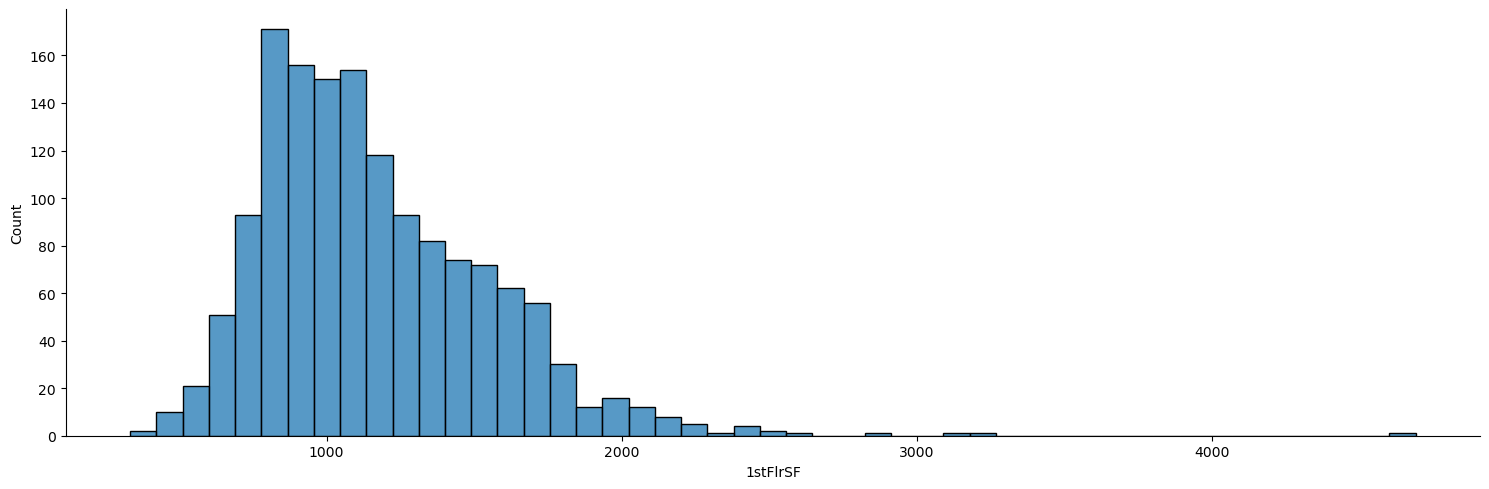

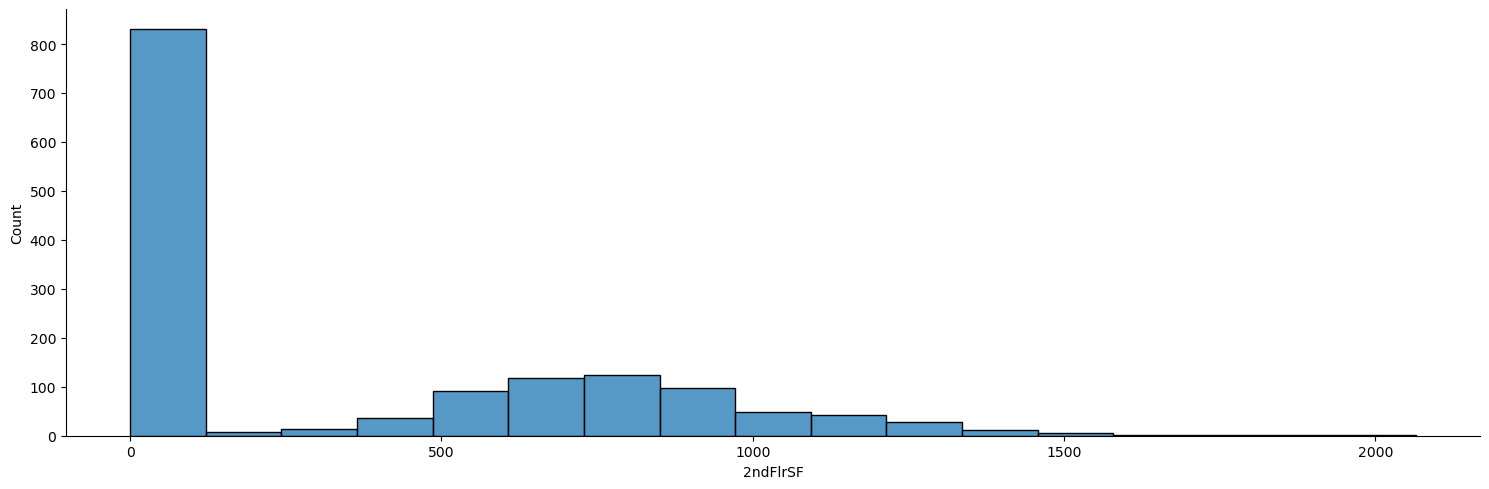

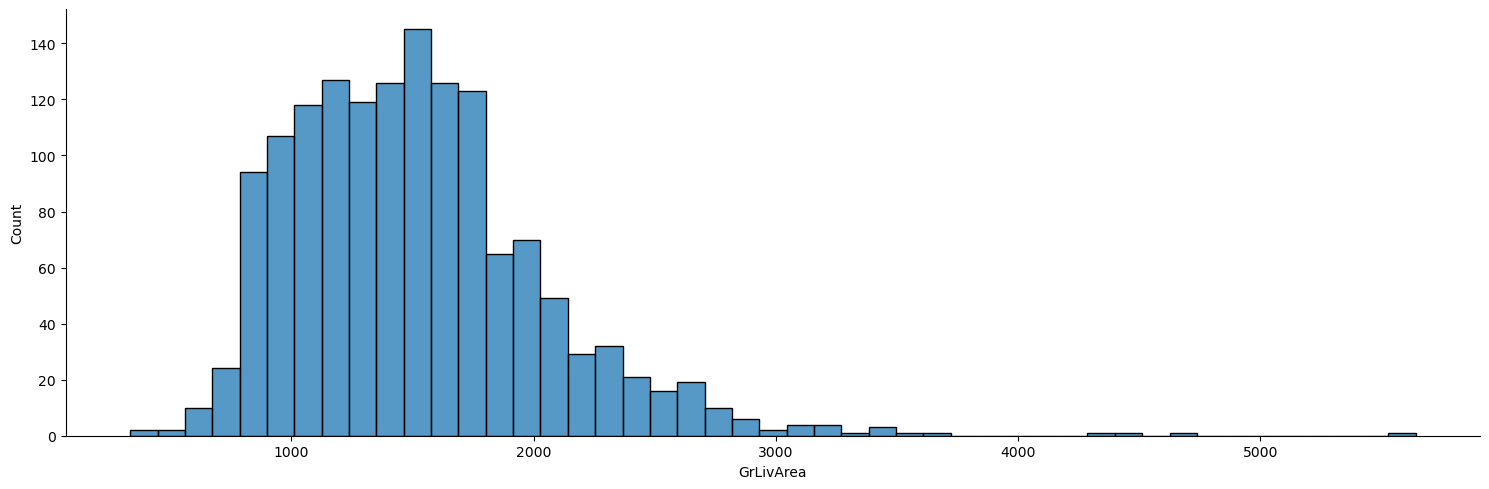

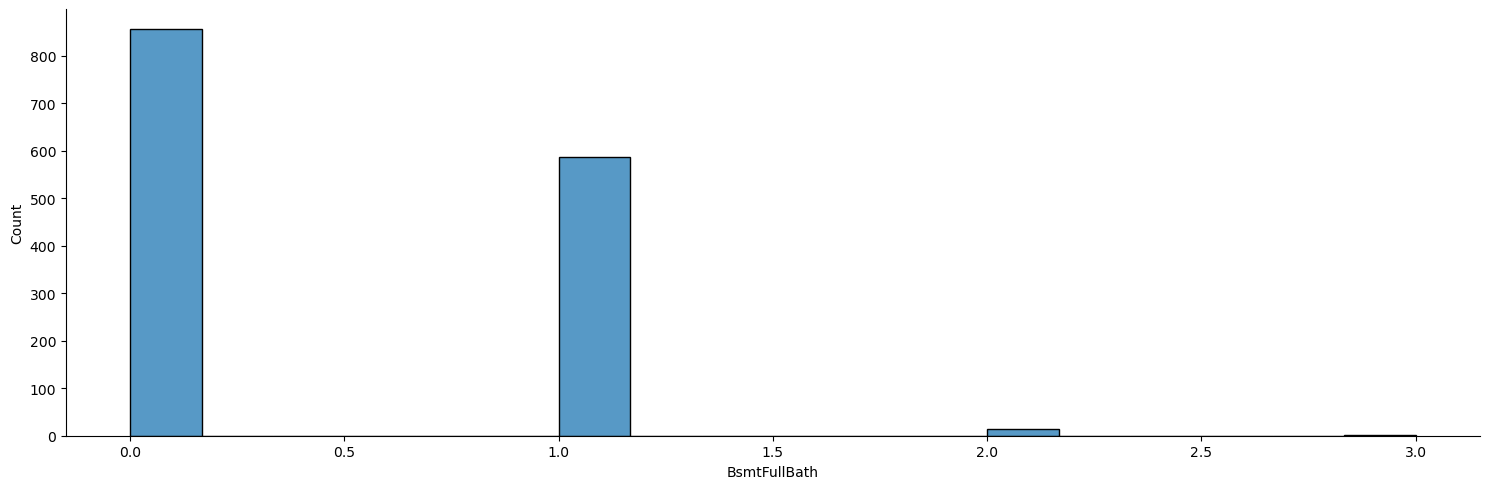

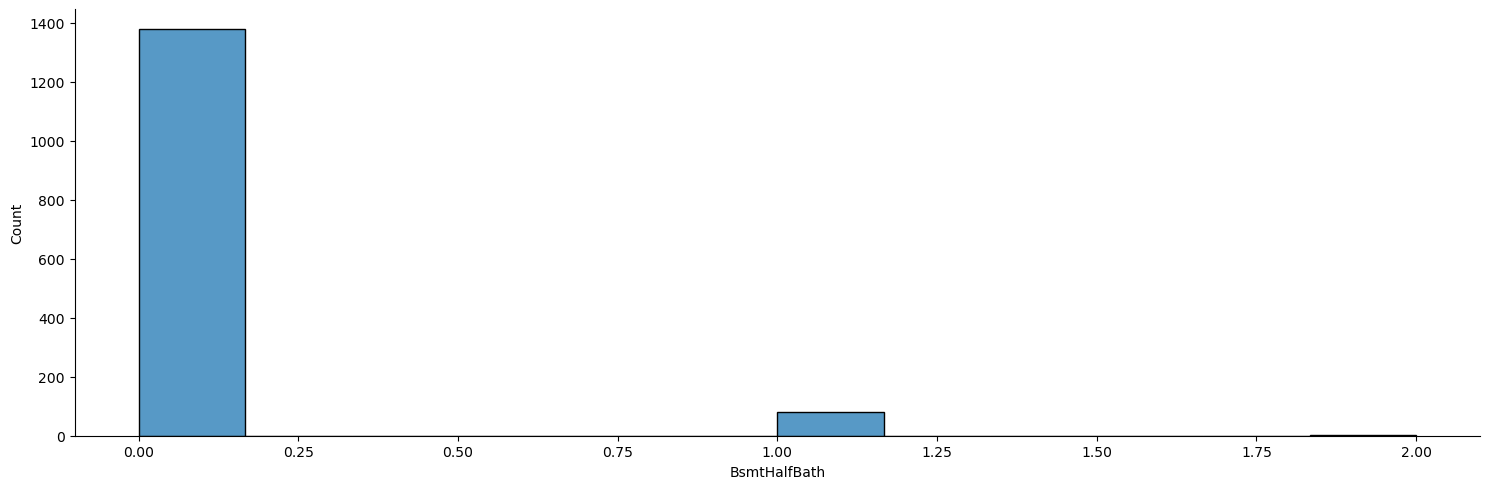

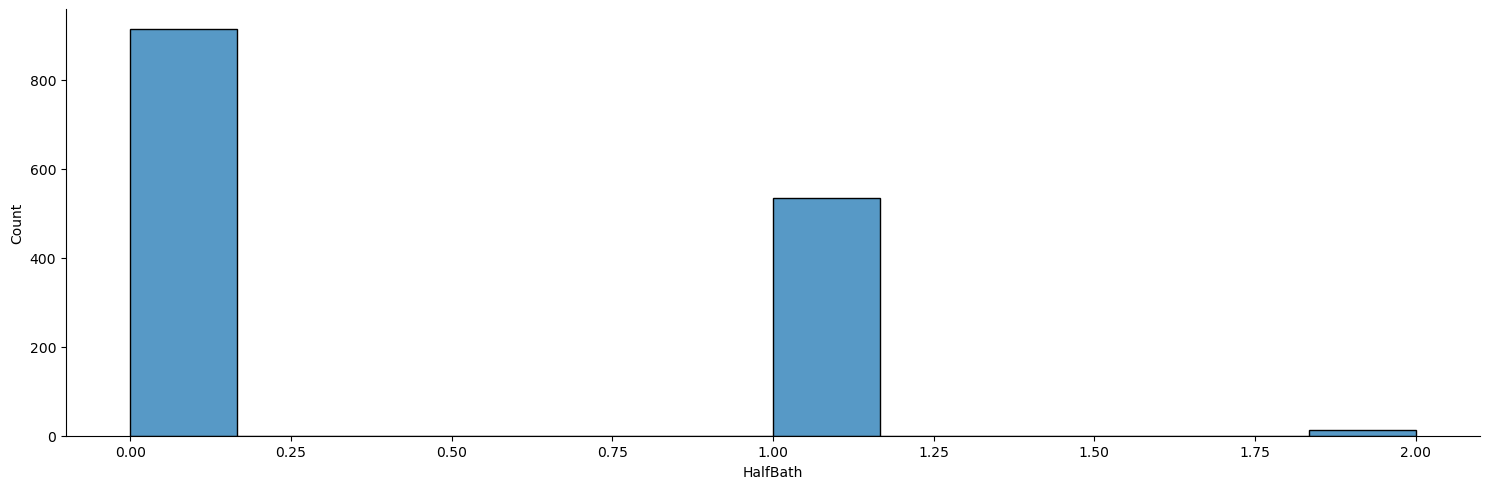

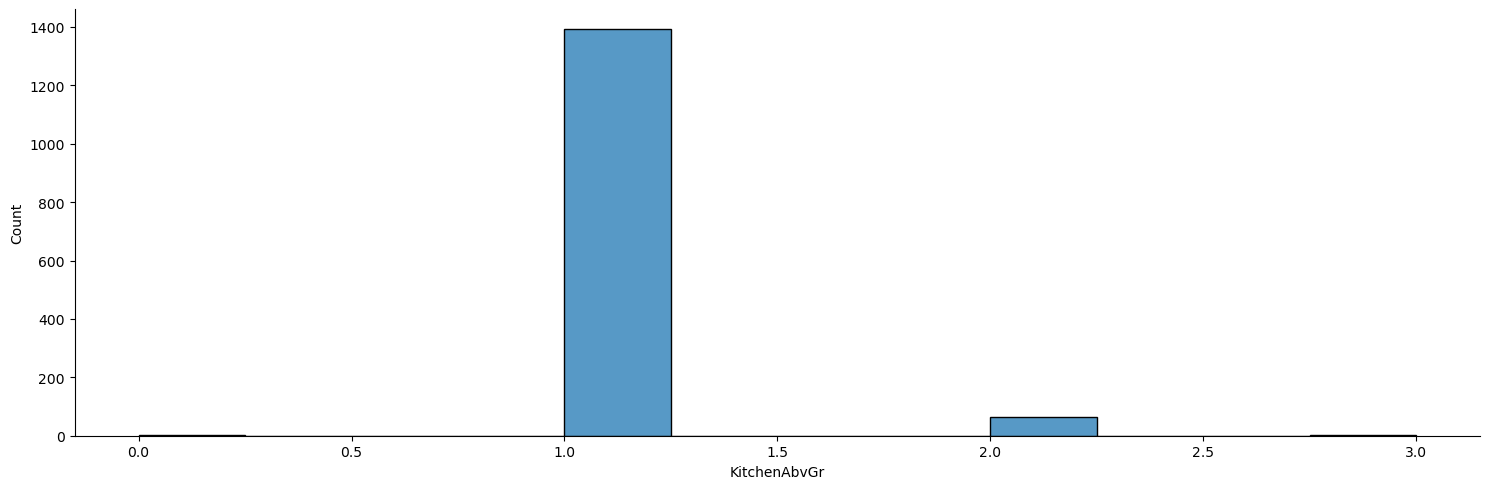

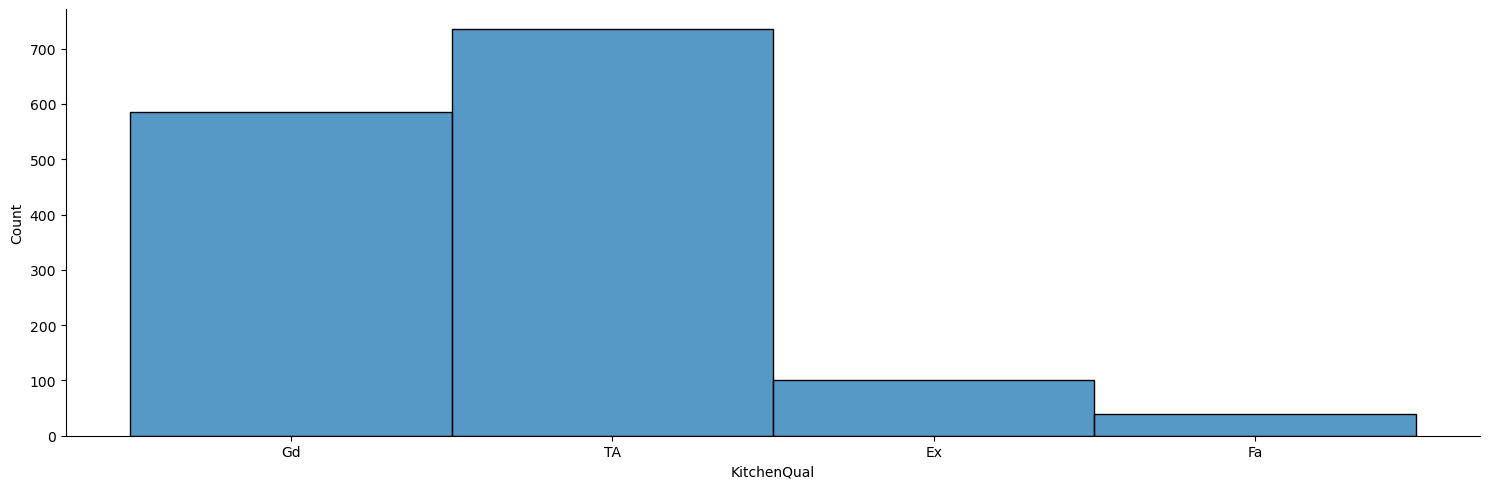

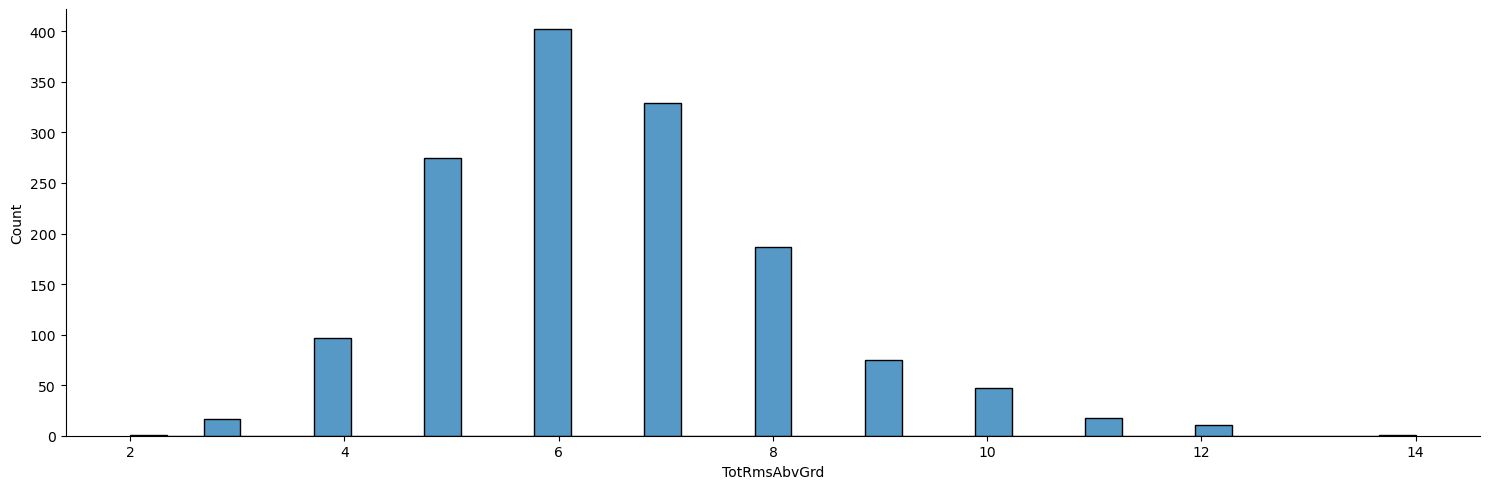

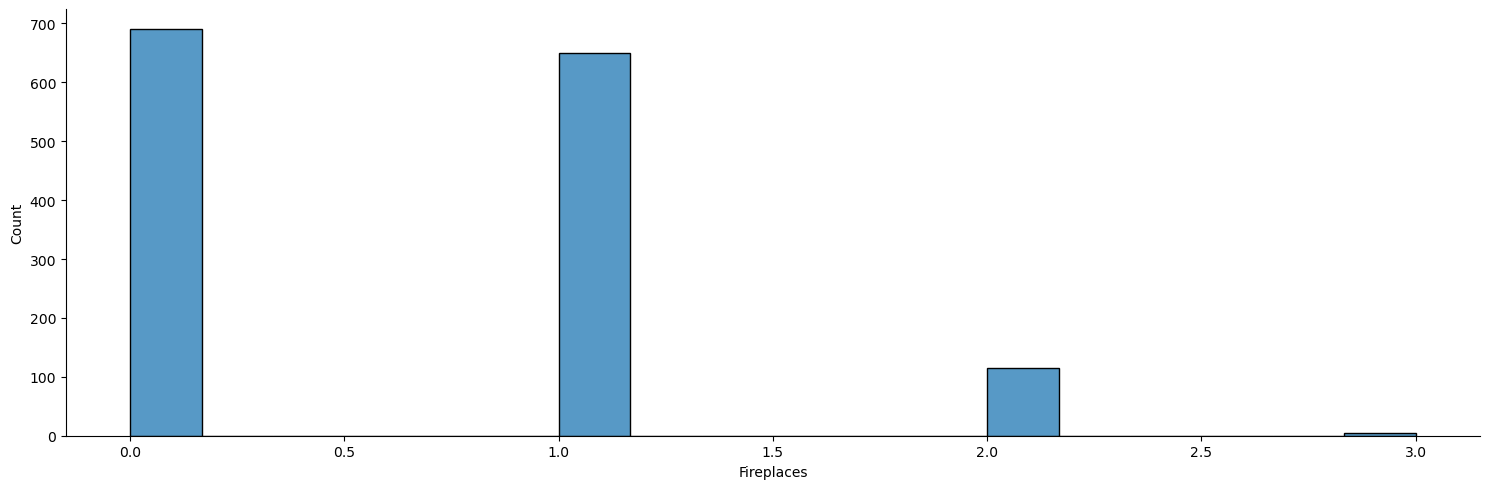

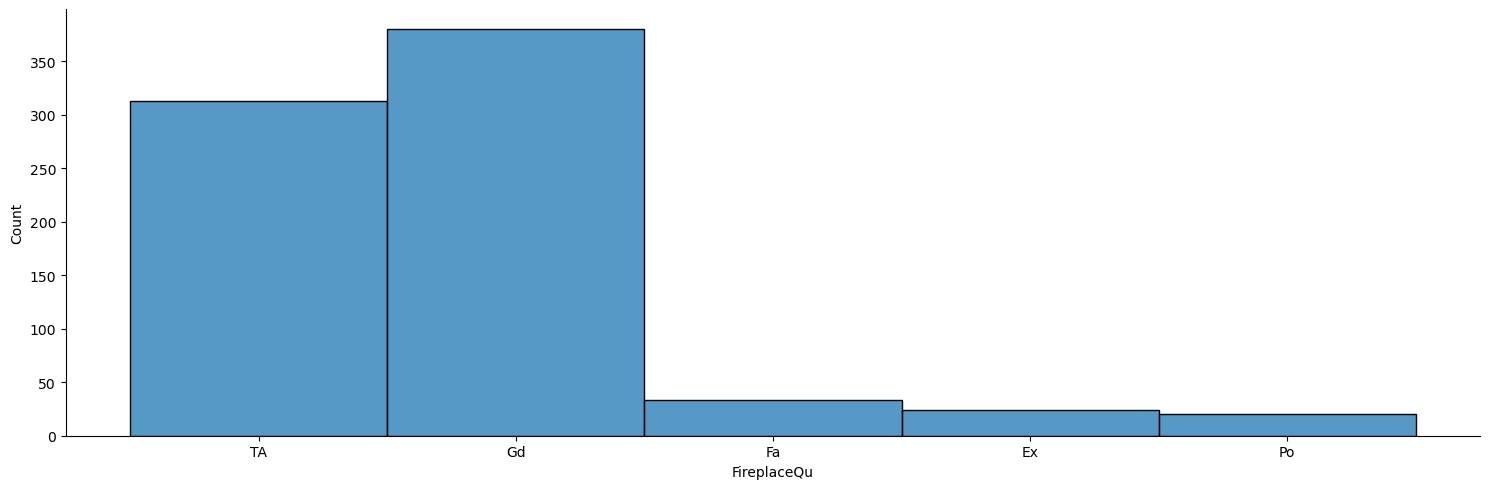

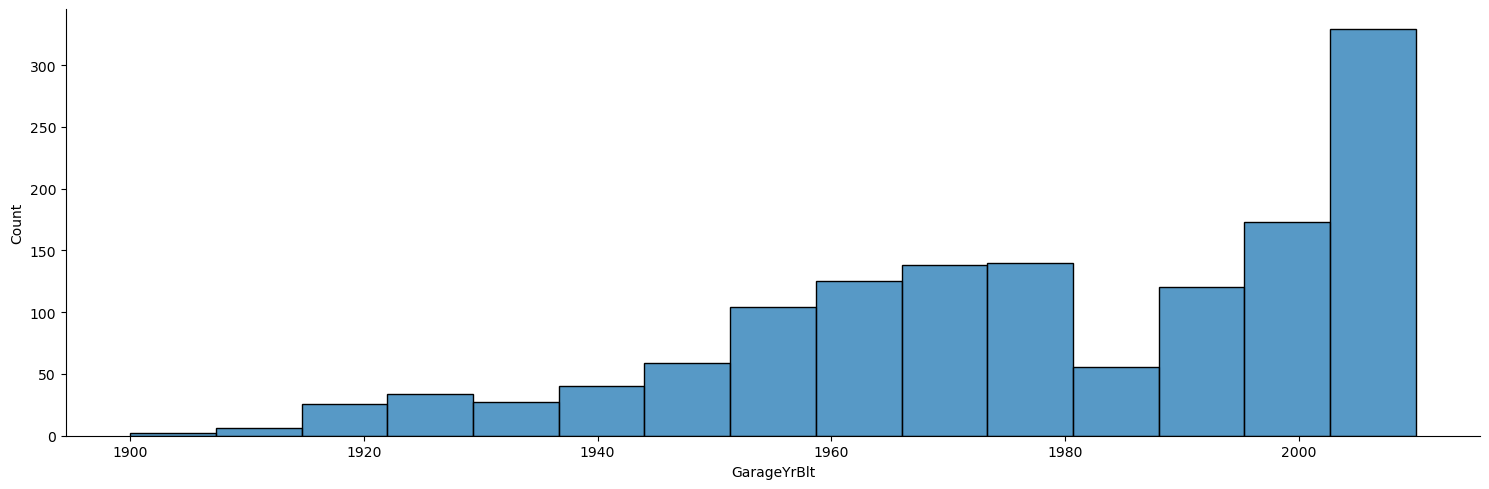

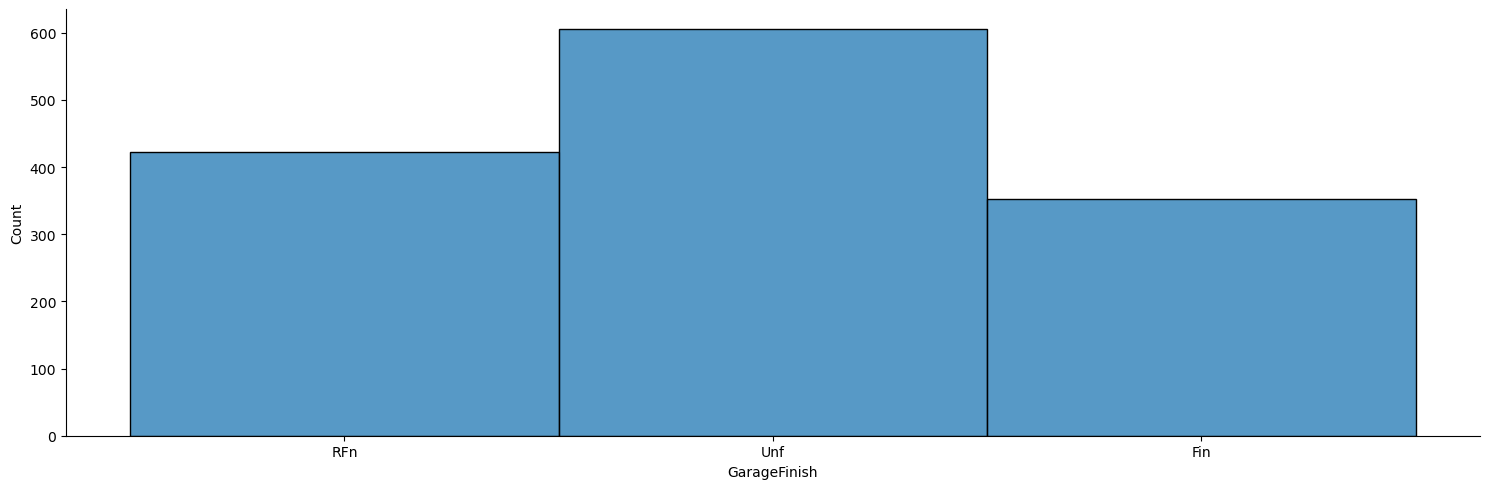

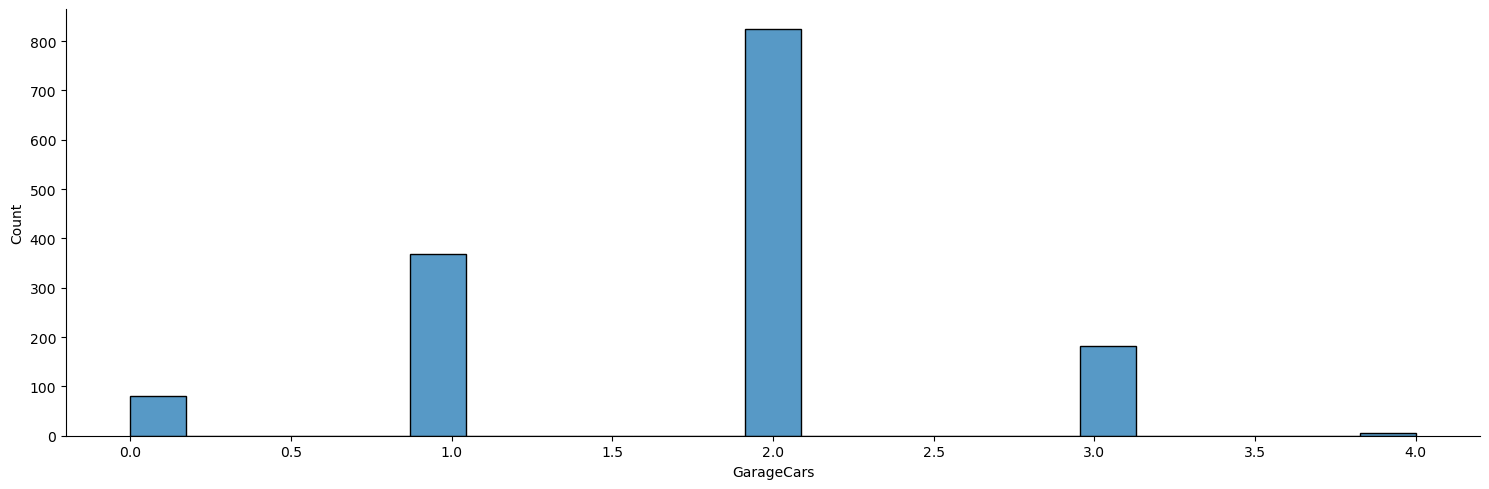

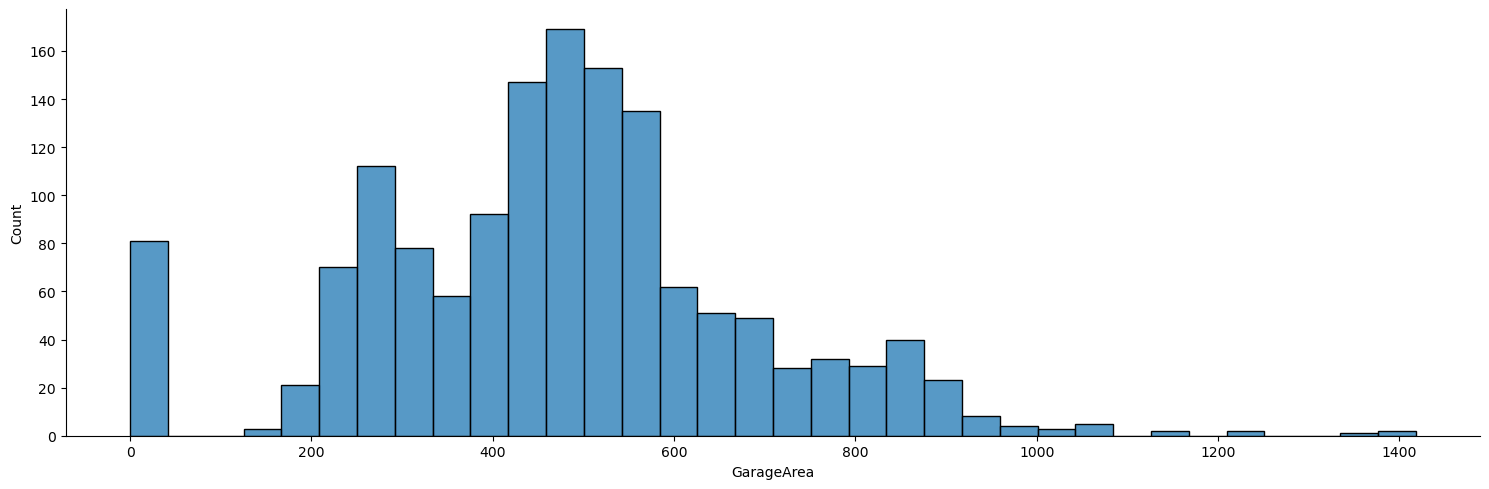

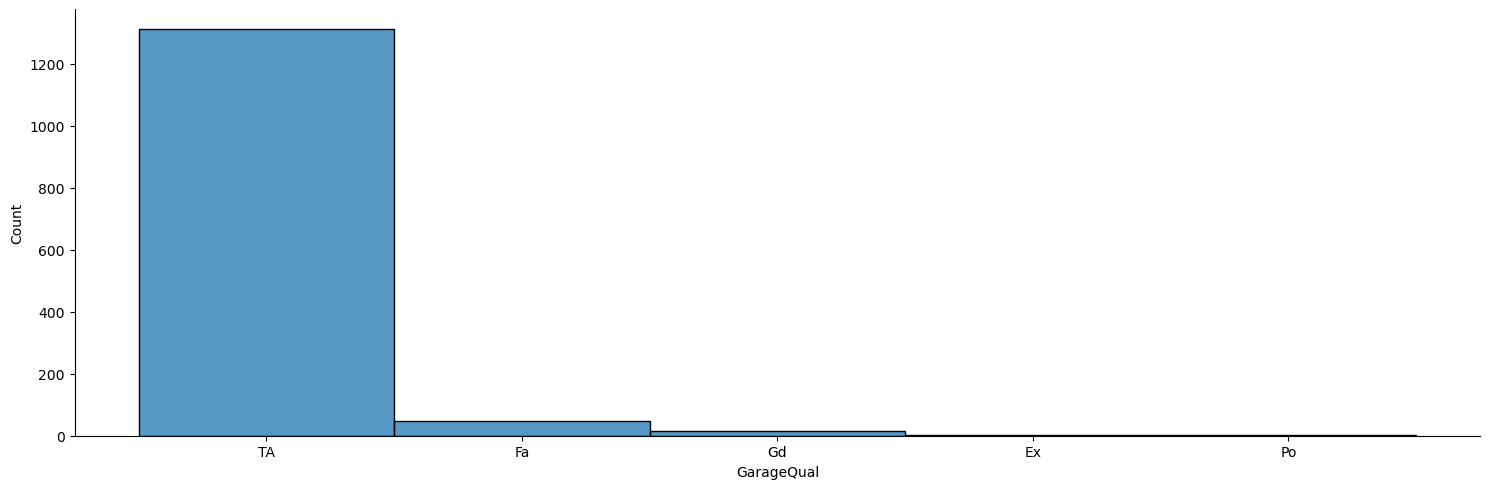

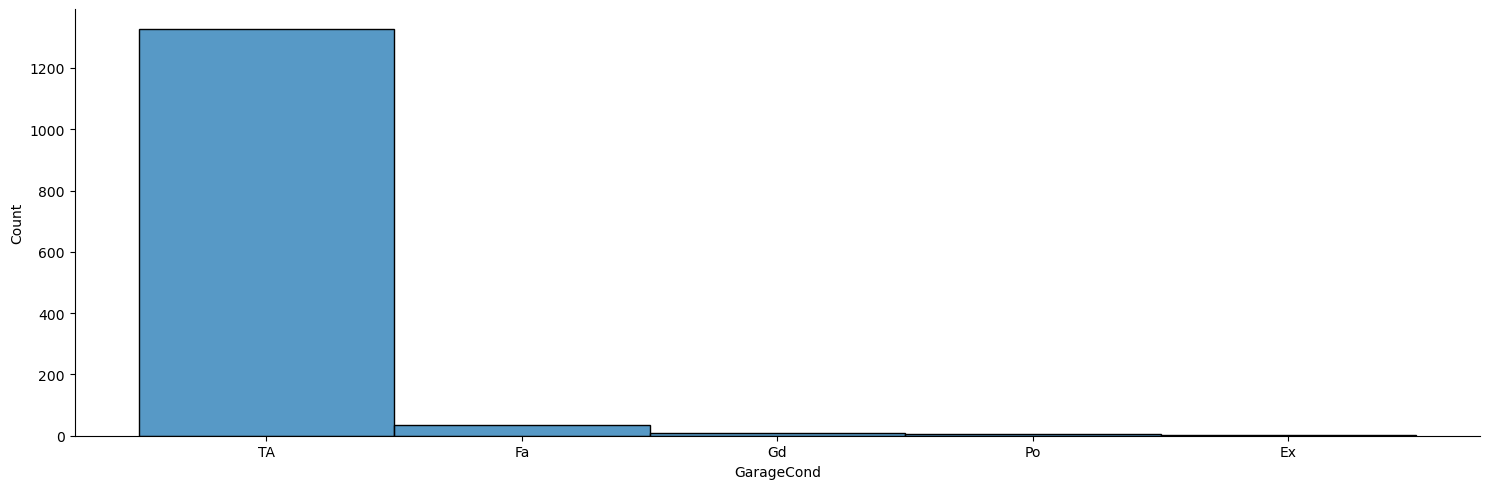

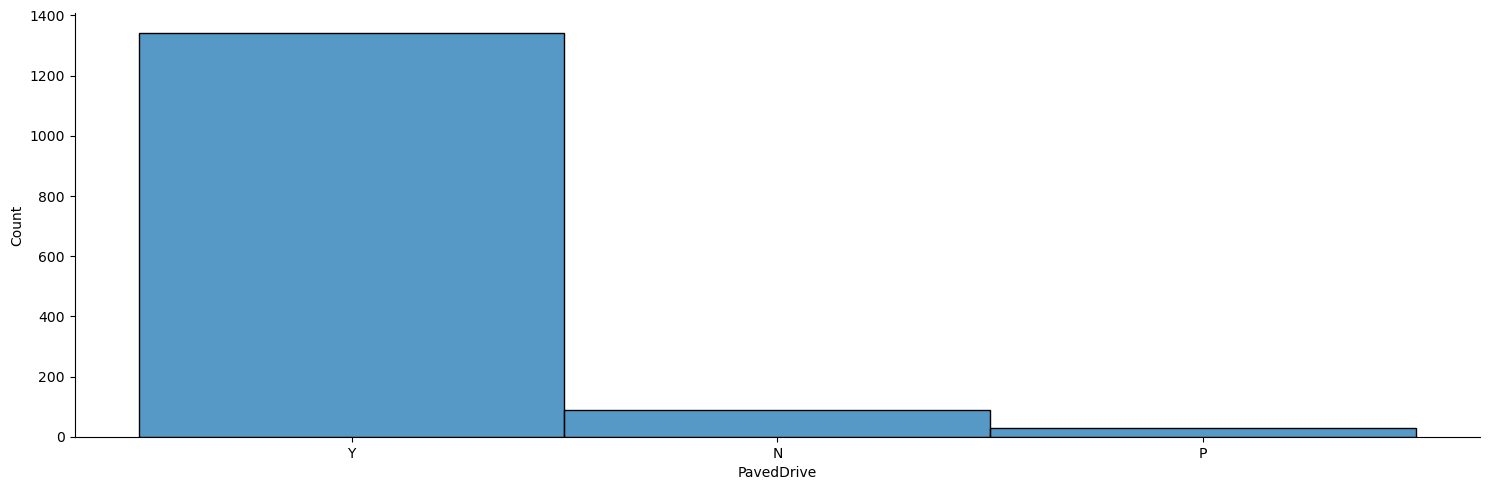

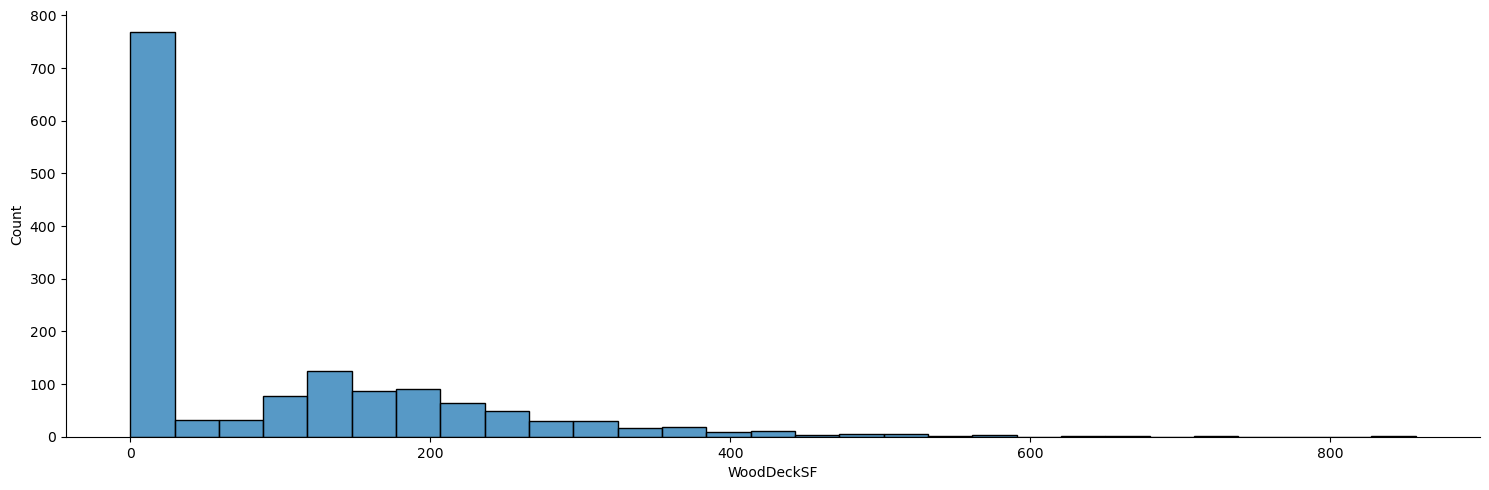

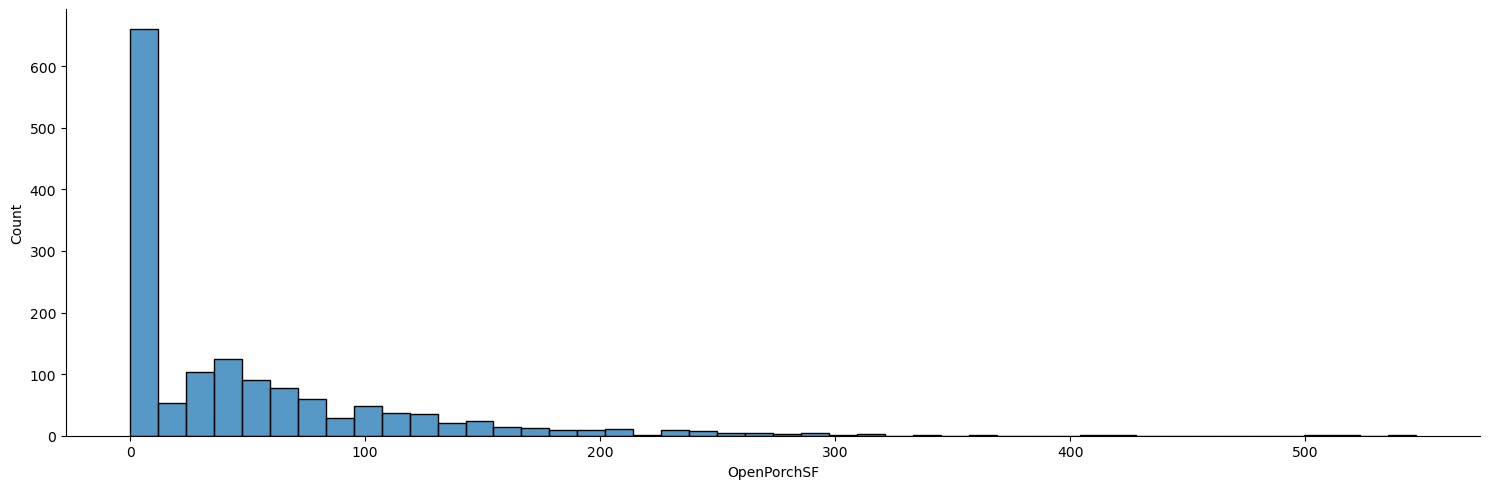

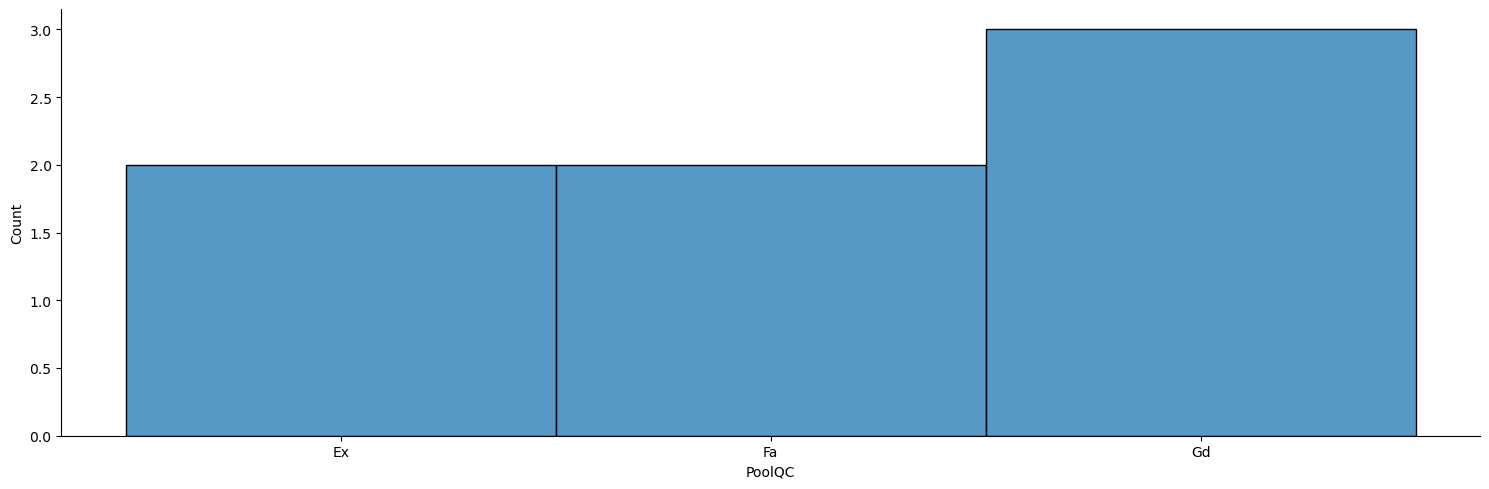

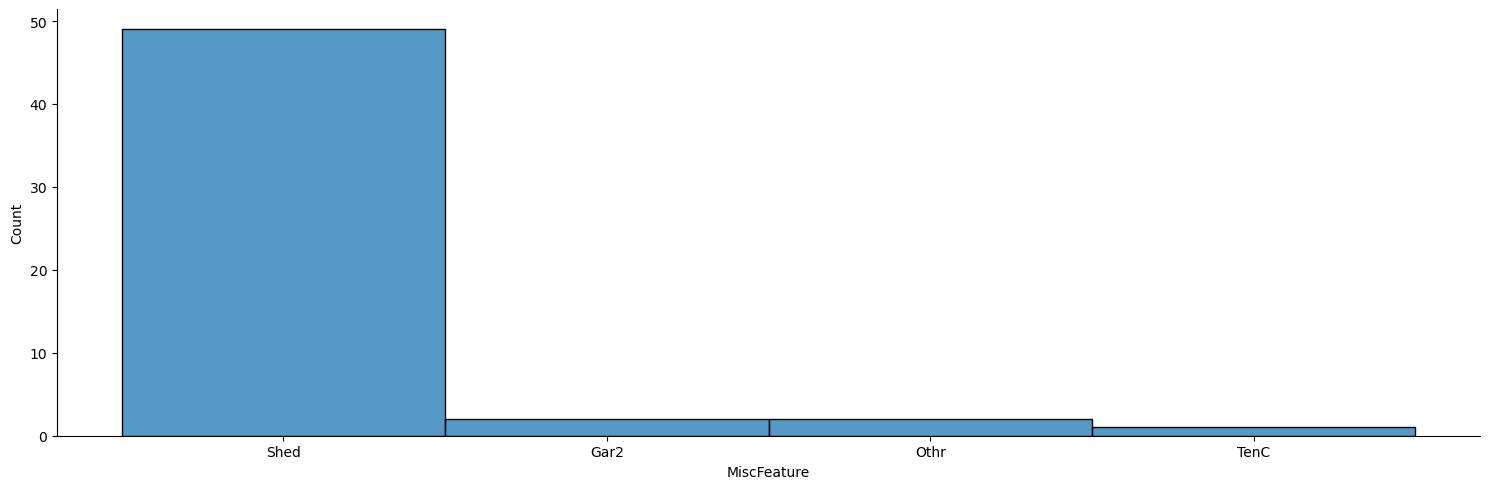

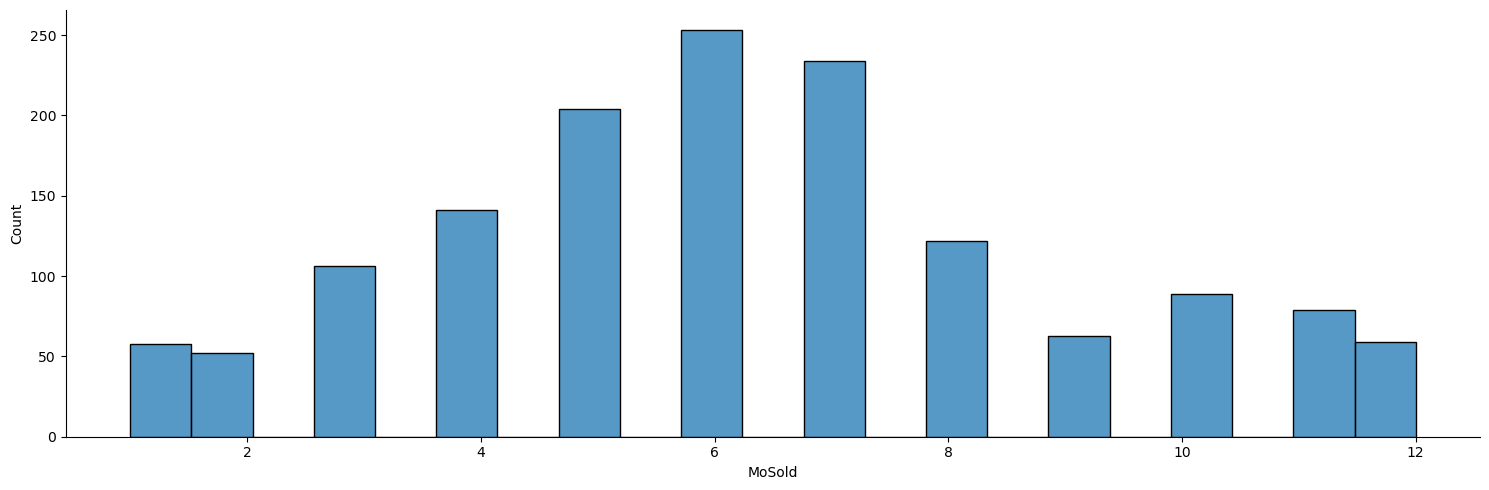

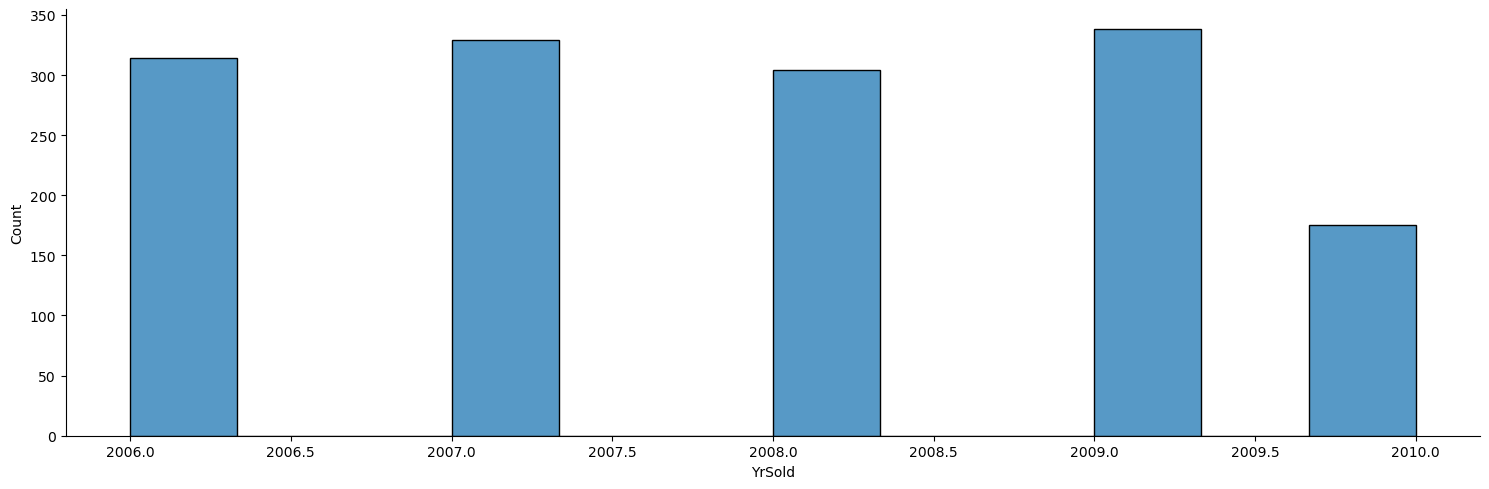

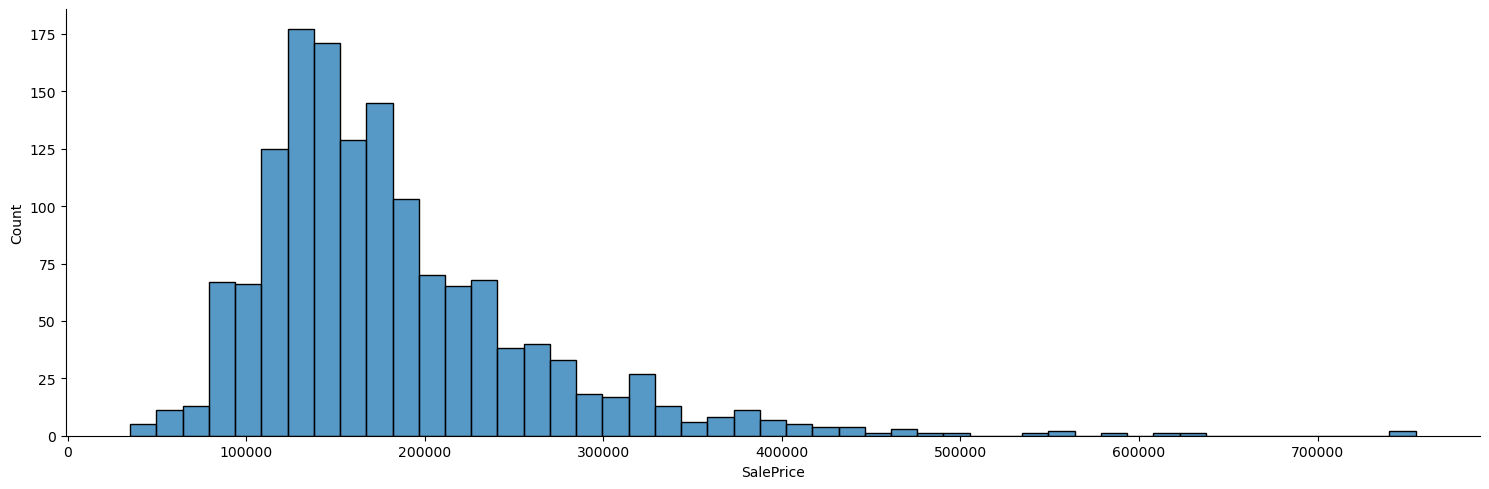

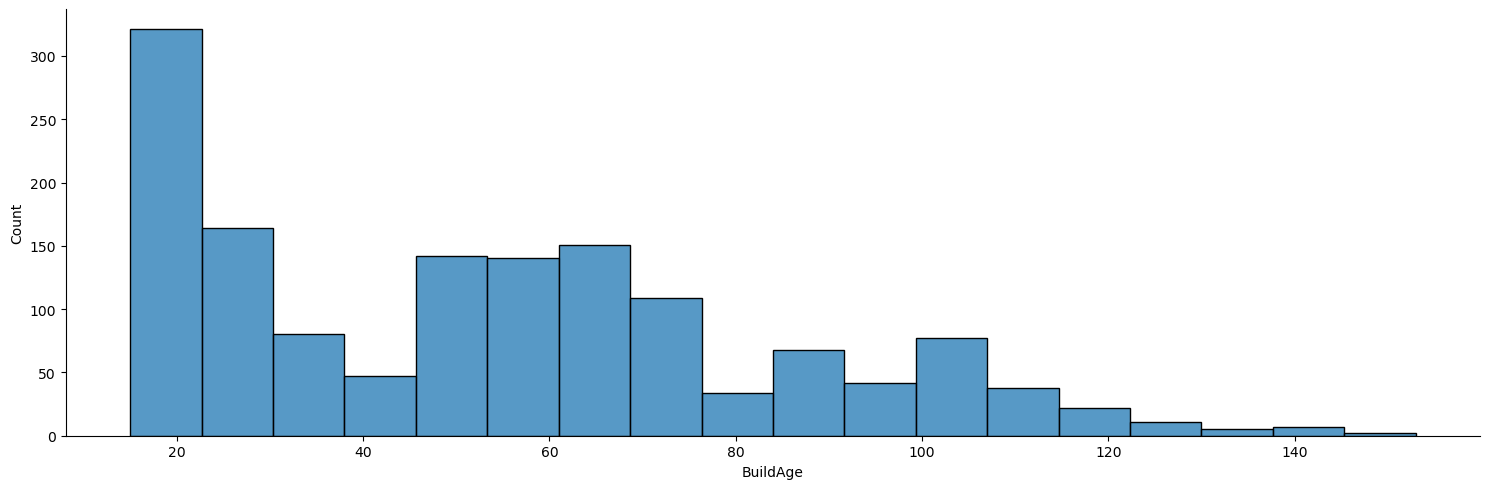

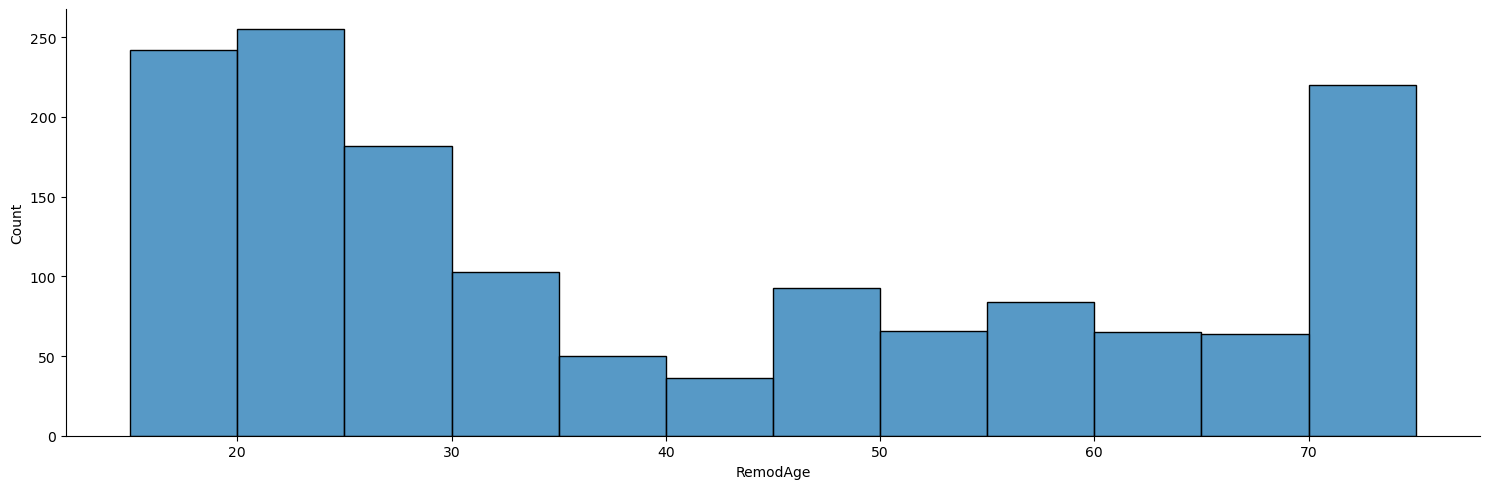

In [56]:
for column in train_data.columns:
    sns.displot(train_data[column], aspect=3)

Train data shape: (1460, 51)
Test data shape: (1459, 80)
a
MSSubClass      0
LotFrontage     0
LotArea         0
LotShape        0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
HouseStyle      0
OverallCond     0
Exterior1st     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
Foundation      0
BsmtQual        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtUnfSF       0
TotalBsmtSF     0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
HalfBath        0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Fireplaces      0
FireplaceQu     0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
GarageQual      0
GarageCond      0
PavedDrive      0
WoodDeckSF      0
OpenPorchSF     0
PoolQC          0
MiscFeature     0
MoSold          0
YrSold          0
SalePrice       0
BuildAge        0
RemodAge        0
dtype: int64
MSSubClass

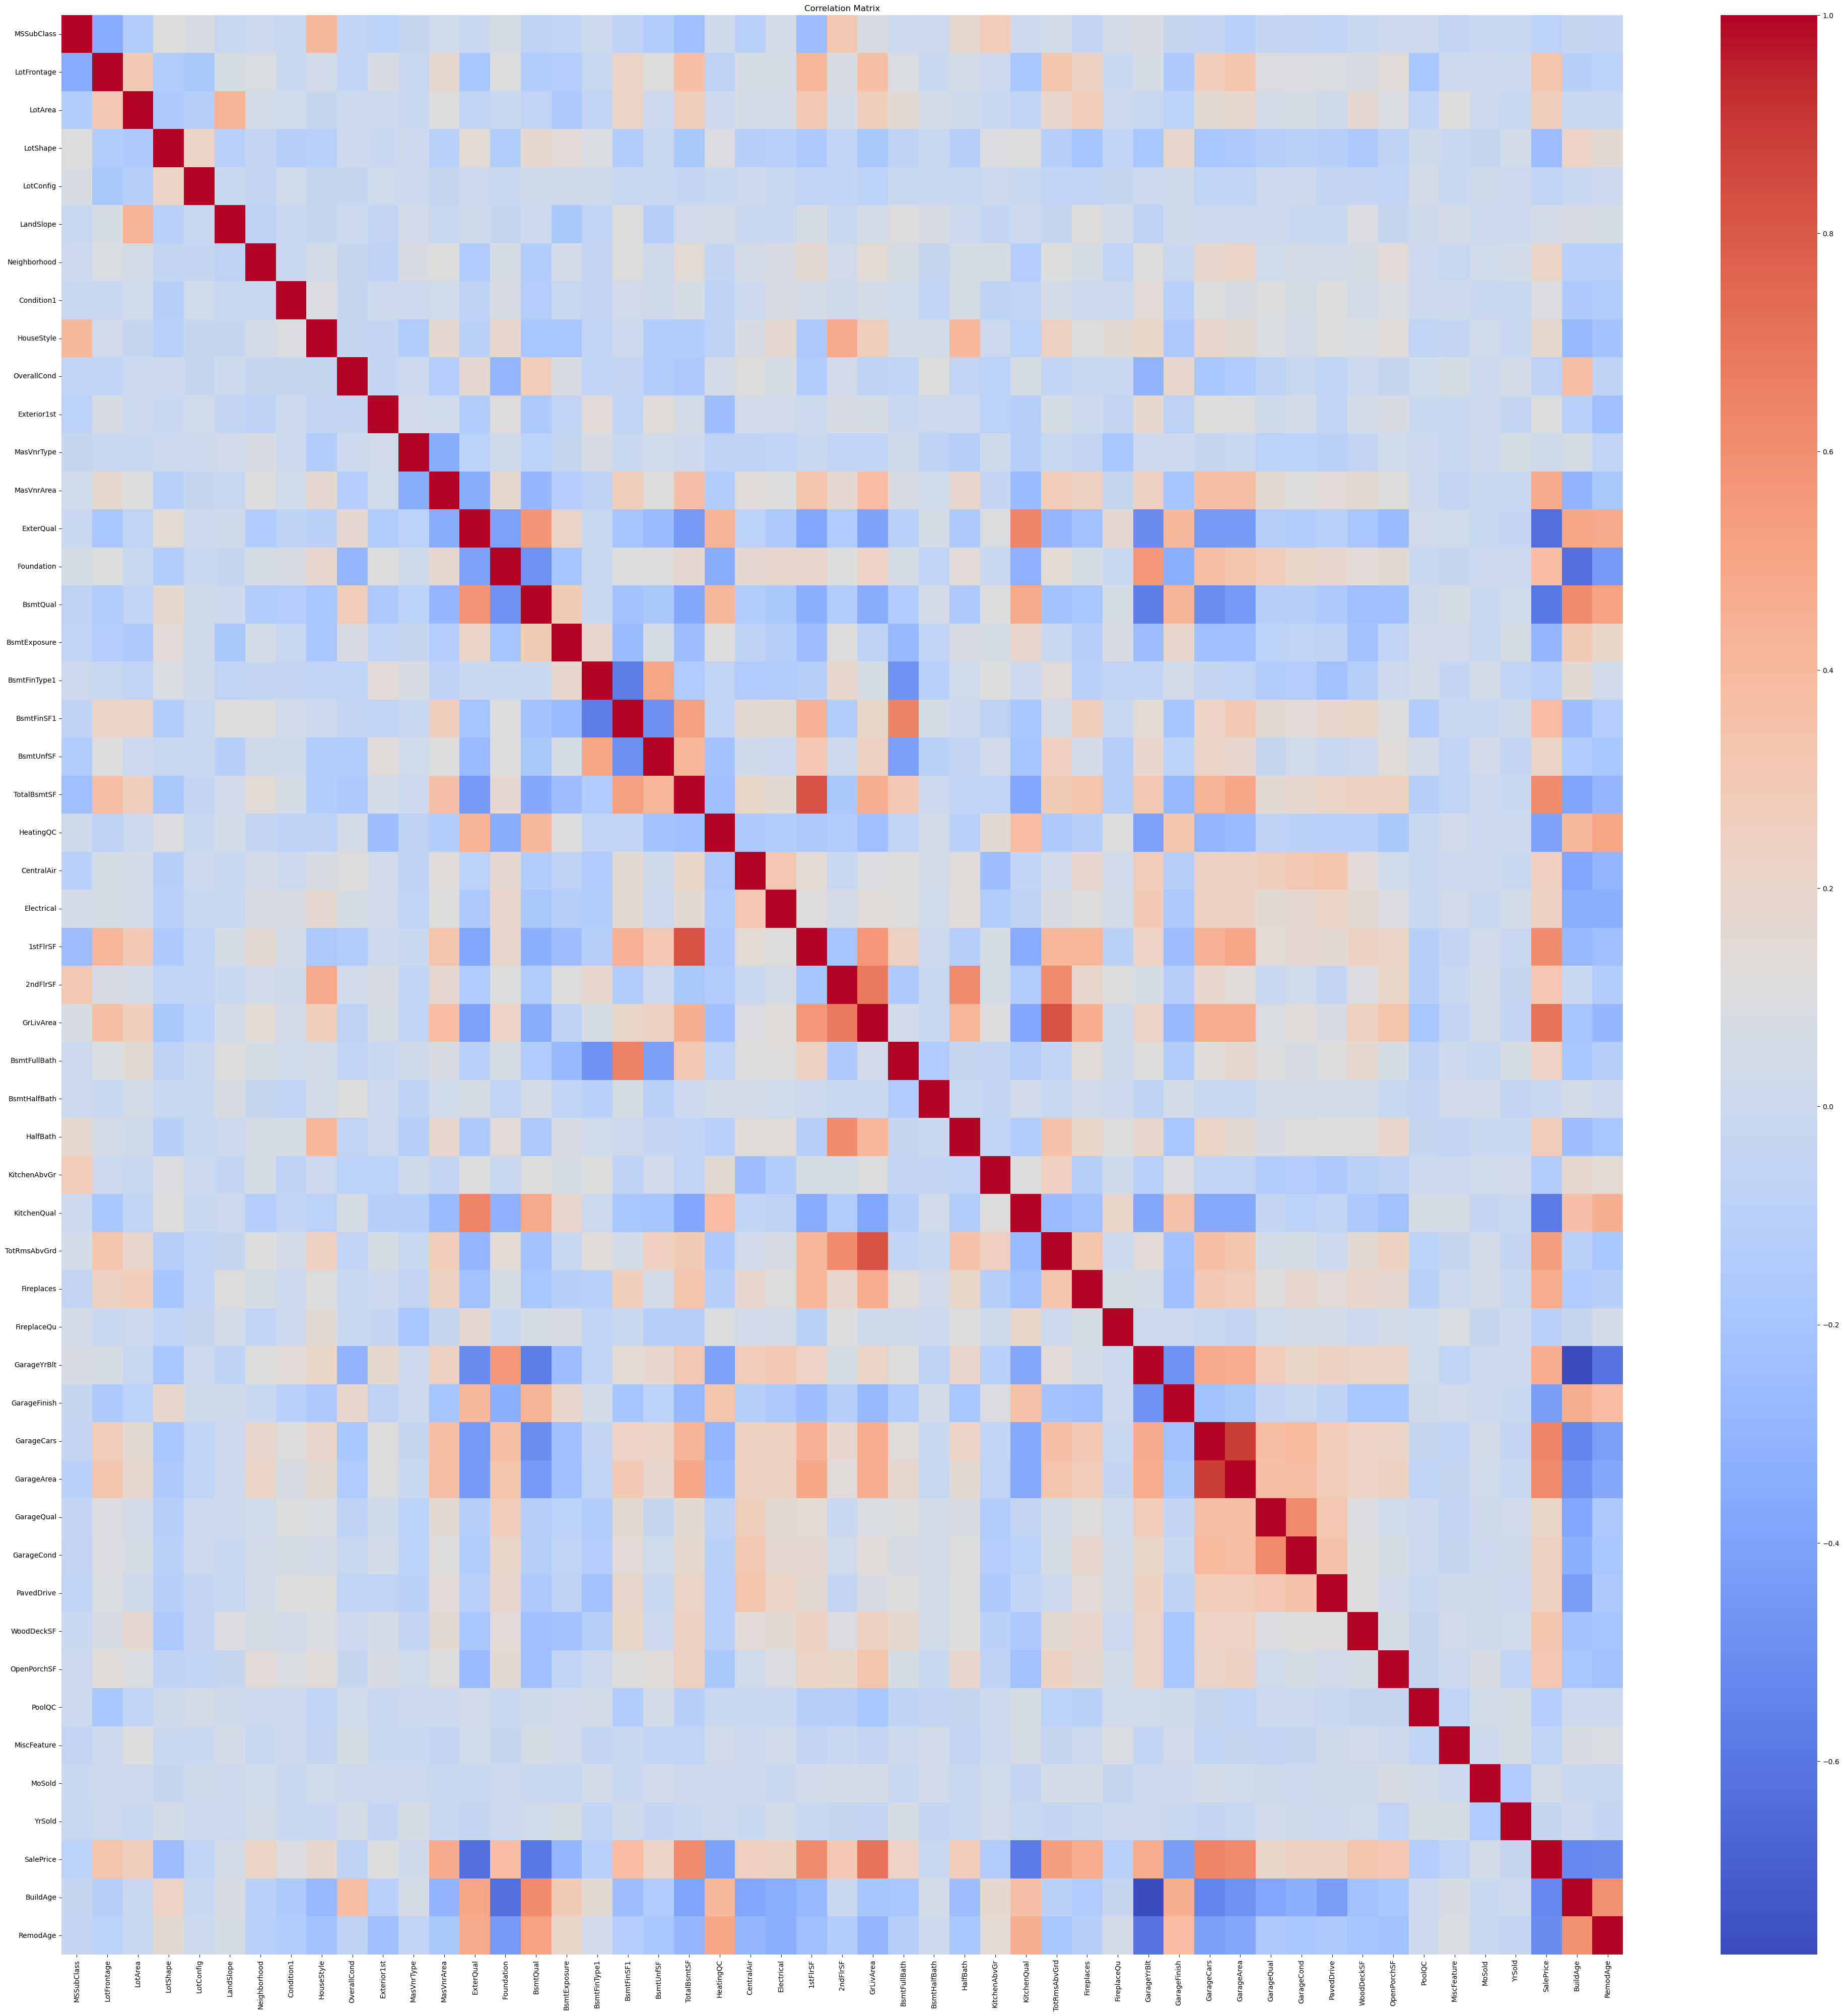

Column: MSSubClass, Rows removed: 0
Column: LotFrontage, Rows removed: 16
Column: LotArea, Rows removed: 30
Column: OverallCond, Rows removed: 1
Column: MasVnrArea, Rows removed: 25
Column: BsmtFinSF1, Rows removed: 0
Column: BsmtUnfSF, Rows removed: 0
Column: TotalBsmtSF, Rows removed: 3
Column: 1stFlrSF, Rows removed: 1
Column: 2ndFlrSF, Rows removed: 0
Column: GrLivArea, Rows removed: 1
Column: BsmtFullBath, Rows removed: 0
Column: BsmtHalfBath, Rows removed: 77
Column: HalfBath, Rows removed: 0
Column: KitchenAbvGr, Rows removed: 62
Column: TotRmsAbvGrd, Rows removed: 0
Column: Fireplaces, Rows removed: 0
Column: GarageYrBlt, Rows removed: 0
Column: GarageCars, Rows removed: 0
Column: GarageArea, Rows removed: 1
Column: WoodDeckSF, Rows removed: 2
Column: OpenPorchSF, Rows removed: 13
Column: MoSold, Rows removed: 0
Column: YrSold, Rows removed: 0
Column: SalePrice, Rows removed: 3
Column: BuildAge, Rows removed: 0
Column: RemodAge, Rows removed: 0


In [57]:
# Required imports
!pip install pandas numpy scikit-learn lazypredict
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
import lazypredict

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print("a" if "SalePrice" in train_data.columns else "b")
# Define outlier bounds - wrapped in a function with error handling
def remove_outliers(datagram, feature):
    if feature not in datagram.columns:
        print(f"Warning: '{feature}' column not found in the dataset")
        return datagram
    
    Q1 = datagram[feature].quantile(0.25)
    Q3 = datagram[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    return datagram[
        (datagram[feature] >= lower_bound) & (datagram[feature] <= upper_bound)
    ]
#define qualitative columns
qualitative_columns = train_data.select_dtypes(include=['object']).columns.tolist()

# Define numeric columns
numeric_cols = [col for col in train_data.columns if col not in qualitative_columns and col != 'Id']


# Fill NA values in numeric columns with their respective medians
for col in numeric_cols:
    if col in train_data.columns:
        if train_data[col].dtype in ['int64', 'float64']:
            train_data[col] = train_data[col].fillna(train_data[col].median())
            if col in test_data.columns:
                test_data[col] = test_data[col].fillna(train_data[col].median())

label_encoders = {}
# Fill missing values in categorical columns with "NA" before encoding
for col in qualitative_columns:
    if col in train_data.columns:
        train_data[col] = train_data[col].fillna("NA")
        if col in test_data.columns:
            test_data[col] = test_data[col].fillna("NA")

# Use OrdinalEncoder to handle unseen categories
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
train_data[qualitative_columns] = encoder.fit_transform(train_data[qualitative_columns])
test_data[qualitative_columns] = encoder.transform(test_data[qualitative_columns])

# Convert to int if necessary
train_data[qualitative_columns] = train_data[qualitative_columns].astype(int)
test_data[qualitative_columns] = test_data[qualitative_columns].astype(int)

# Fill any remaining NaN values with -1
train_data.fillna(-1, inplace=True)
test_data.fillna(-1, inplace=True)


# First, fill missing values in categorical columns
for col in qualitative_columns:
    if col in train_data.columns:
        # Fill missing values with mode (most frequent value)
        mode_val = train_data[col].mode()[0]
        train_data[col] = train_data[col].fillna(mode_val)
        if col in test_data.columns:
            test_data[col] = test_data[col].fillna(mode_val)

# Then apply LabelEncoder
for col in qualitative_columns:
    if col in train_data.columns and train_data[col].dtype == "object":
        try:
            le = LabelEncoder()
            train_data[col] = le.fit_transform(train_data[col].astype(str))
            if col in test_data.columns:
                test_data[col] = le.transform(test_data[col].astype(str))
            label_encoders[col] = le
        except Exception as e:
            print(f"Error processing column {col}: {e}")


train_data.replace([np.inf, -np.inf], np.nan, inplace=True)
test_data.replace([np.inf, -np.inf], np.nan, inplace=True)


train_data.fillna(-1, inplace=True)
test_data.fillna(-1, inplace=True)
print(train_data.isna().sum())  # Check for NaNs
print(np.isinf(train_data).sum())  # Check for infinite values




print("a" if "SalePrice" in train_data.columns else "b")
print(train_data.isna().sum())  # Check for NaNs
print(np.isinf(train_data).sum())  # Check for infinite values

print(test_data)
columns = train_data.columns

print("\nProcessing complete. Final train data shape:", train_data.shape)
scaler = MinMaxScaler()
train_data = pd.DataFrame(scaler.fit_transform(train_data), columns=columns)
corr_matrix = train_data.corr()
# Plot the heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

for col in numeric_cols:
    before = train_data.shape[0]
    train_data = remove_outliers(train_data, col)
    after = train_data.shape[0]
    print(f"Column: {col}, Rows removed: {before - after}")

#for column in train_data.columns:
#    sns.displot(train_data[column], aspect=2)

drop_based_on_correlation = ["Exterior1st" or "Exterior2nd", "GarageCars" or "GarageArea", "GarageYrBlt" or "GarageFinish"]

In [58]:
tmp = ["KitchenAbvGr", "BsmtHalfBath", "EnclosedPorch"]

def bin(col, bins):
    for i in range(1, len(bins)):
        bin_label = f"{col}{bins[i - 1]}_{bins[i]}"
        train_data[bin_label] = ((train_data[col] >= bins[i - 1]) & (train_data[col] < bins[i])).astype(int)
        #test_data[bin_label] = ((test_data[col] >= bins[i - 1]) & (test_data[col] < bins[i])).astype(int)
        #train_data.drop(col, axis=1)
bin("BuildAge", [0, 40, 80, 120, 140])
bin("TotalBsmtSF", [0, 1000, 2000, 3000, 4000, 5000, 6110])
bin("LotFrontage", [21, 79, 139, 197, 255, 313])
bin(
    "LotArea",
    [
        1300,
        15563,
        29826,
        44089,
        58352,
        72615,
        86878,
        101141,
        115404,
        129667,
        143930,
        158193,
        172456,
        186719,
        200982,
        215245,
    ],
)
bin("1stFlrSF", [334, 1251, 2168, 3085, 4002, 4692])
bin("2ndFlrSF", [0, 500, 1000, 1500, 2065])
bin("GrLivArea", [334, 1661, 2988, 4315, 5642])
bin(
    "WoodDeckSF",
    [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 857],
)
bin("OpenPorchSF", [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 547])

bin("GarageArea", [0, 200, 400, 600, 800, 1000, 1200, 1418])

#train_data["FrontagePerSF"] = train_data["LotFrontage"]/train_data["LotArea"]
#train_data["totalSQFT"] = train_data["GrLivArea"] + train_data["TotalBsmtSF"] 

#test_data["FrontagePerSF"] = test_data["LotFrontage"]/test_data["LotArea"]
#test_data["totalSQFT"] = test_data["GrLivArea"] + test_data["TotalBsmtSF"]


todrop = ["GarageArea", "LotFrontage", "LotArea", "BsmtFullBath", "HalfBath","GrLivArea","TotalBsmtSF", "GarageArea", "1stFlrSF", "BuildAge", "OpenPorchSF", "WoodDeckSF", "GrLivArea", "2ndFlrSF"]
#train_data.drop(todrop, axis=1)
#test_data.drop(todrop, axis=1)

train_data.fillna(-1, inplace=True)
test_data.fillna(-1, inplace=True)

print("a" if "SalePrice" in train_data.columns else "b")

#train_data.drop(["YearBuilt", "TotalBsmtSF", "LotFrontage", "LotArea", "1stFlrSF", "2ndFlrSF", "GrLivArea", "WoodDeckSF","OpenPorchSF", "YearBuilt"], axis=1)
#test_data.drop(["YearBuilt", "TotalBsmtSF", "LotFrontage", "LotArea", "1stFlrSF", "2ndFlrSF", "GrLivArea", "WoodDeckSF","OpenPorchSF","YearBuilt"], axis=1)

print("a" if "SalePrice" in train_data.columns else "b")

print(train_data["SalePrice"])


columns = train_data.columns

#fit_transform returns a numPy array by default, but this shouldn't matter as SalePrice is numeric  
#train data will now be all numeric columns scaled. 

print("a" if "SalePrice" in train_data.columns else "b")

Inputs = [col for col in train_data.columns if col != "SalePrice"]
Output = ["SalePrice"]

#train_data.fillna(-1, inplace=True)
#test_data.fillna(-1, inplace=True)

print("done")

print(train_data.isna().sum().sum())  # Check for NaNs
print(1 == np.isinf(train_data).sum())  # Check for infinite values

a
a
0      0.24
2      0.26
3      0.15
4      0.30
5      0.15
       ... 
1454   0.21
1455   0.19
1456   0.24
1457   0.32
1458   0.15
Name: SalePrice, Length: 1225, dtype: float64
a
done
0
MSSubClass             False
LotFrontage            False
LotArea                False
LotShape               False
LotConfig              False
                       ...  
GarageArea400_600      False
GarageArea600_800      False
GarageArea800_1000     False
GarageArea1000_1200    False
GarageArea1200_1418    False
Length: 128, dtype: bool


In [42]:
#train_X = train_data[Inputs]
#train_y = train_data[Output].values.ravel()

#test_X = test_data[Inputs]

X = train_data[Inputs]
y = train_data[Output].values.ravel()

X.fillna(-1, inplace=True)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=.2, random_state=38)

# Convert categorical columns to numeric
train_X = train_X.apply(pd.to_numeric, errors='coerce')
test_X = test_X.apply(pd.to_numeric, errors='coerce')
#X_scaled = scaler.fit_transform(train_X)

clf = LazyRegressor()
models, predictions = clf.fit(train_X, test_X, train_y, test_y)
print(models)

 98%|█████████▊| 41/42 [00:12<00:00,  4.13it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2780
[LightGBM] [Info] Number of data points in the train set: 980, number of used features: 49
[LightGBM] [Info] Start training from score 0.195647


100%|██████████| 42/42 [00:12<00:00,  3.25it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LGBMRegressor                                0.75       0.88  0.03        0.74
GradientBoostingRegressor                    0.75       0.88  0.03        0.83
HistGradientBoostingRegressor                0.75       0.88  0.03        1.99
ExtraTreesRegressor                          0.72       0.87  0.03        1.63
TransformedTargetRegressor                   0.71       0.87  0.03        0.05
LinearRegression                             0.71       0.87  0.03        0.05
Lars                                         0.71       0.87  0.03        0.05
Ridge                                        0.71       0.87  0.03        0.03
LassoCV                                      0.71       0.87  0.03        0.31
LassoLarsCV                                  0.71       0.87  0.03        0.15
ElasticNetCV                                 0.71   

In [43]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=.2, random_state=38)
train_X = train_data[Inputs].apply(pd.to_numeric, errors='coerce')
train_y = train_data[Output].apply(pd.to_numeric, errors='coerce').values.ravel()
#test_X = test_X.drop(columns="Id", axis = 1, inplace=True)
print(test_X.head)
#print("Max: ", y.max)
#print("Min: ", y.min)

<bound method NDFrame.head of       MSSubClass  LotFrontage  LotArea  LotShape  LotConfig  LandSlope  \
333         0.59         0.13     0.03      1.00       0.75       0.00   
308         0.06         0.16     0.05      0.00       1.00       0.00   
1402        0.00         0.15     0.03      1.00       1.00       0.00   
621         0.24         0.24     0.04      1.00       1.00       0.00   
1366        0.24         0.16     0.04      0.00       1.00       0.00   
...          ...          ...      ...       ...        ...        ...   
317         0.24         0.18     0.04      1.00       1.00       0.00   
957         0.00         0.17     0.03      1.00       1.00       0.00   
261         0.24         0.16     0.04      0.00       1.00       0.00   
554         0.24         0.22     0.04      1.00       1.00       0.00   
448         0.18         0.10     0.03      1.00       1.00       0.00   

      Neighborhood  Condition1  HouseStyle  OverallCond  ...  \
333           0.6

Gradient Boosting Regressor Model 

0
a
done fitting gbr
0.8849152217527873


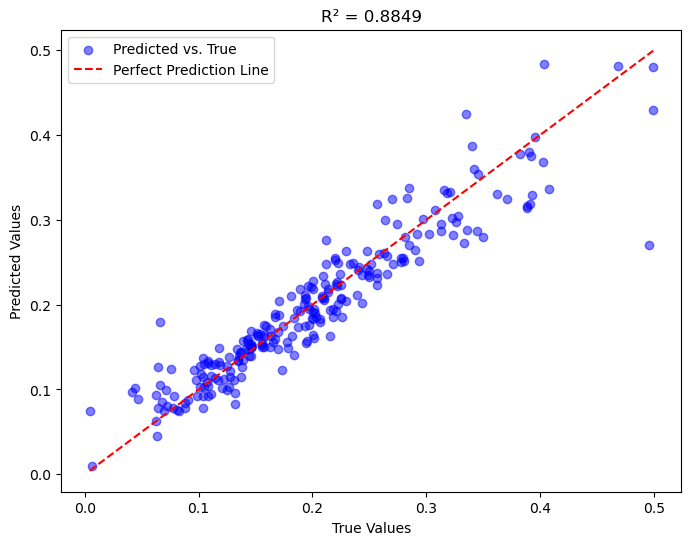

Mean Squared Error: 0.0010112503789678662
Max Error: 0.22537133367519985
Feature Importances: MSSubClass, 0.0005445088069088072
Feature Importances: LotFrontage, 0.008010441784301613
Feature Importances: LotArea, 0.010088715944249852
Feature Importances: LotShape, 0.0006143893595366974
Feature Importances: LotConfig, 0.0005032115804785052
Feature Importances: LandSlope, 0.00014781421337077801
Feature Importances: Neighborhood, 0.007435486116378361
Feature Importances: Condition1, 0.0008432873534847726
Feature Importances: HouseStyle, 0.0003505650690328127
Feature Importances: OverallCond, 0.010914303184196731
Feature Importances: Exterior1st, 0.002446285205049821
Feature Importances: Exterior2nd, 0.000500924055826529
Feature Importances: MasVnrType, 0.0002839977725700779
Feature Importances: MasVnrArea, 0.002158424143060073
Feature Importances: ExterQual, 0.04169601044059916
Feature Importances: Foundation, 0.00010454556138861482
Feature Importances: BsmtQual, 0.03074654694298611
Featu

In [45]:
#new imports 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, max_error, roc_curve, auc
print(train_data["SalePrice"].isna().sum())
#CREATE the model 
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=.2, random_state=38)

gbrModel = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.1, max_depth=4, random_state=42)
print("a")
#test_X = test_X.drop(columns="Id", axis = 1, inplace=True)
# Train the model on the training data
gbrModel.fit(train_X, train_y)

print("done fitting gbr")
#test_X = test_X.drop(columns="Id", axis = 1, inplace=True)
# Make predictions on the test data
y_pred = gbrModel.predict(test_X)

r2 = gbrModel.score(test_X, test_y)
print(r2)

plt.figure(figsize=(8, 6))
plt.scatter(test_y, y_pred, color='blue', alpha=0.5, label='Predicted vs. True')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'R² = {r2:.4f}')
plt.legend()
plt.show()


# Evaluate the model's performance using Mean Squared Error (MSE)
mse = mean_squared_error(test_y, y_pred)
print(f"Mean Squared Error: {mse}")

maxerror = max_error(test_y, y_pred)
print(f"Max Error: {maxerror}")
#The max_error function computes the maximum residual error, a metric that captures the worst case error between 
#the predicted value and the true value.


#-----------------------------------
feature_names = train_X.columns
to_Drop = []
#Print the feature importances (in case of multivariate data)
for i, feature_name in enumerate(feature_names):
    print(f"Feature Importances: {feature_name}, {gbrModel.feature_importances_[i]}")
    if gbrModel.feature_importances_[i] == 0:
        to_Drop.append(feature_name)
print(to_Drop)
print(f"Most important feature: ", {max(gbrModel.feature_importances_)})

XGBRegressor Model 

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'HouseStyle', 'OverallCond',
       ...
       'OpenPorchSF400_450', 'OpenPorchSF450_500', 'OpenPorchSF500_547',
       'GarageArea0_200', 'GarageArea200_400', 'GarageArea400_600',
       'GarageArea600_800', 'GarageArea800_1000', 'GarageArea1000_1200',
       'GarageArea1200_1418'],
      dtype='object', length=129)
Mean Squared Error (MSE): 0.0012
R-squared: 0.8667


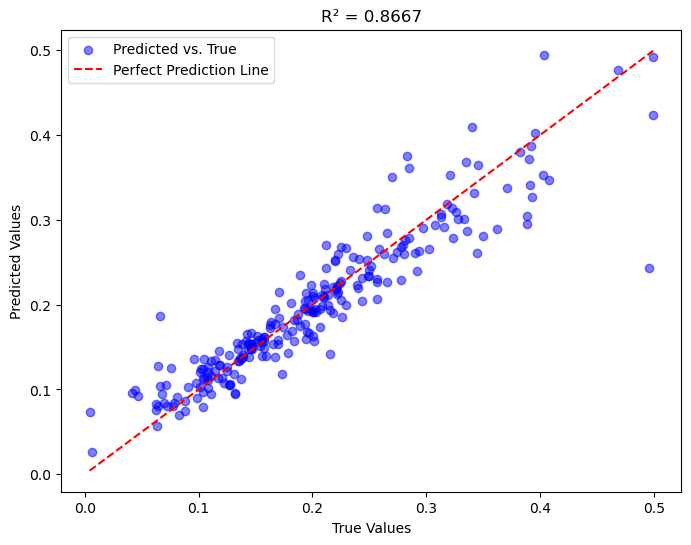

In [47]:
!pip install xgboost
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

print(train_X.columns)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=.2, random_state=38)

XGBmodel = XGBRegressor(objective='reg:squarederror', eta = 0.1, random_state=42)



#scale data
scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.transform(test_X)


# 5. Make predictions on the test data
XGBmodel.fit(train_X, train_y)
y_pred = XGBmodel.predict(test_X)


# 6. Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(test_y, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# 7. Optionally, you can also calculate R-squared (R²) to evaluate the model fit
r2 = XGBmodel.score(test_X, test_y)
print(f"R-squared: {r2:.4f}")

# Step 6: Plot true values vs. predicted values (for R² visualization)
plt.figure(figsize=(8, 6))
plt.scatter(test_y, y_pred, color='blue', alpha=0.5, label='Predicted vs. True')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'R² = {r2:.4f}')
plt.legend()
plt.show()

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'HouseStyle', 'OverallCond',
       ...
       'OpenPorchSF400_450', 'OpenPorchSF450_500', 'OpenPorchSF500_547',
       'GarageArea0_200', 'GarageArea200_400', 'GarageArea400_600',
       'GarageArea600_800', 'GarageArea800_1000', 'GarageArea1000_1200',
       'GarageArea1200_1418'],
      dtype='object', length=129)


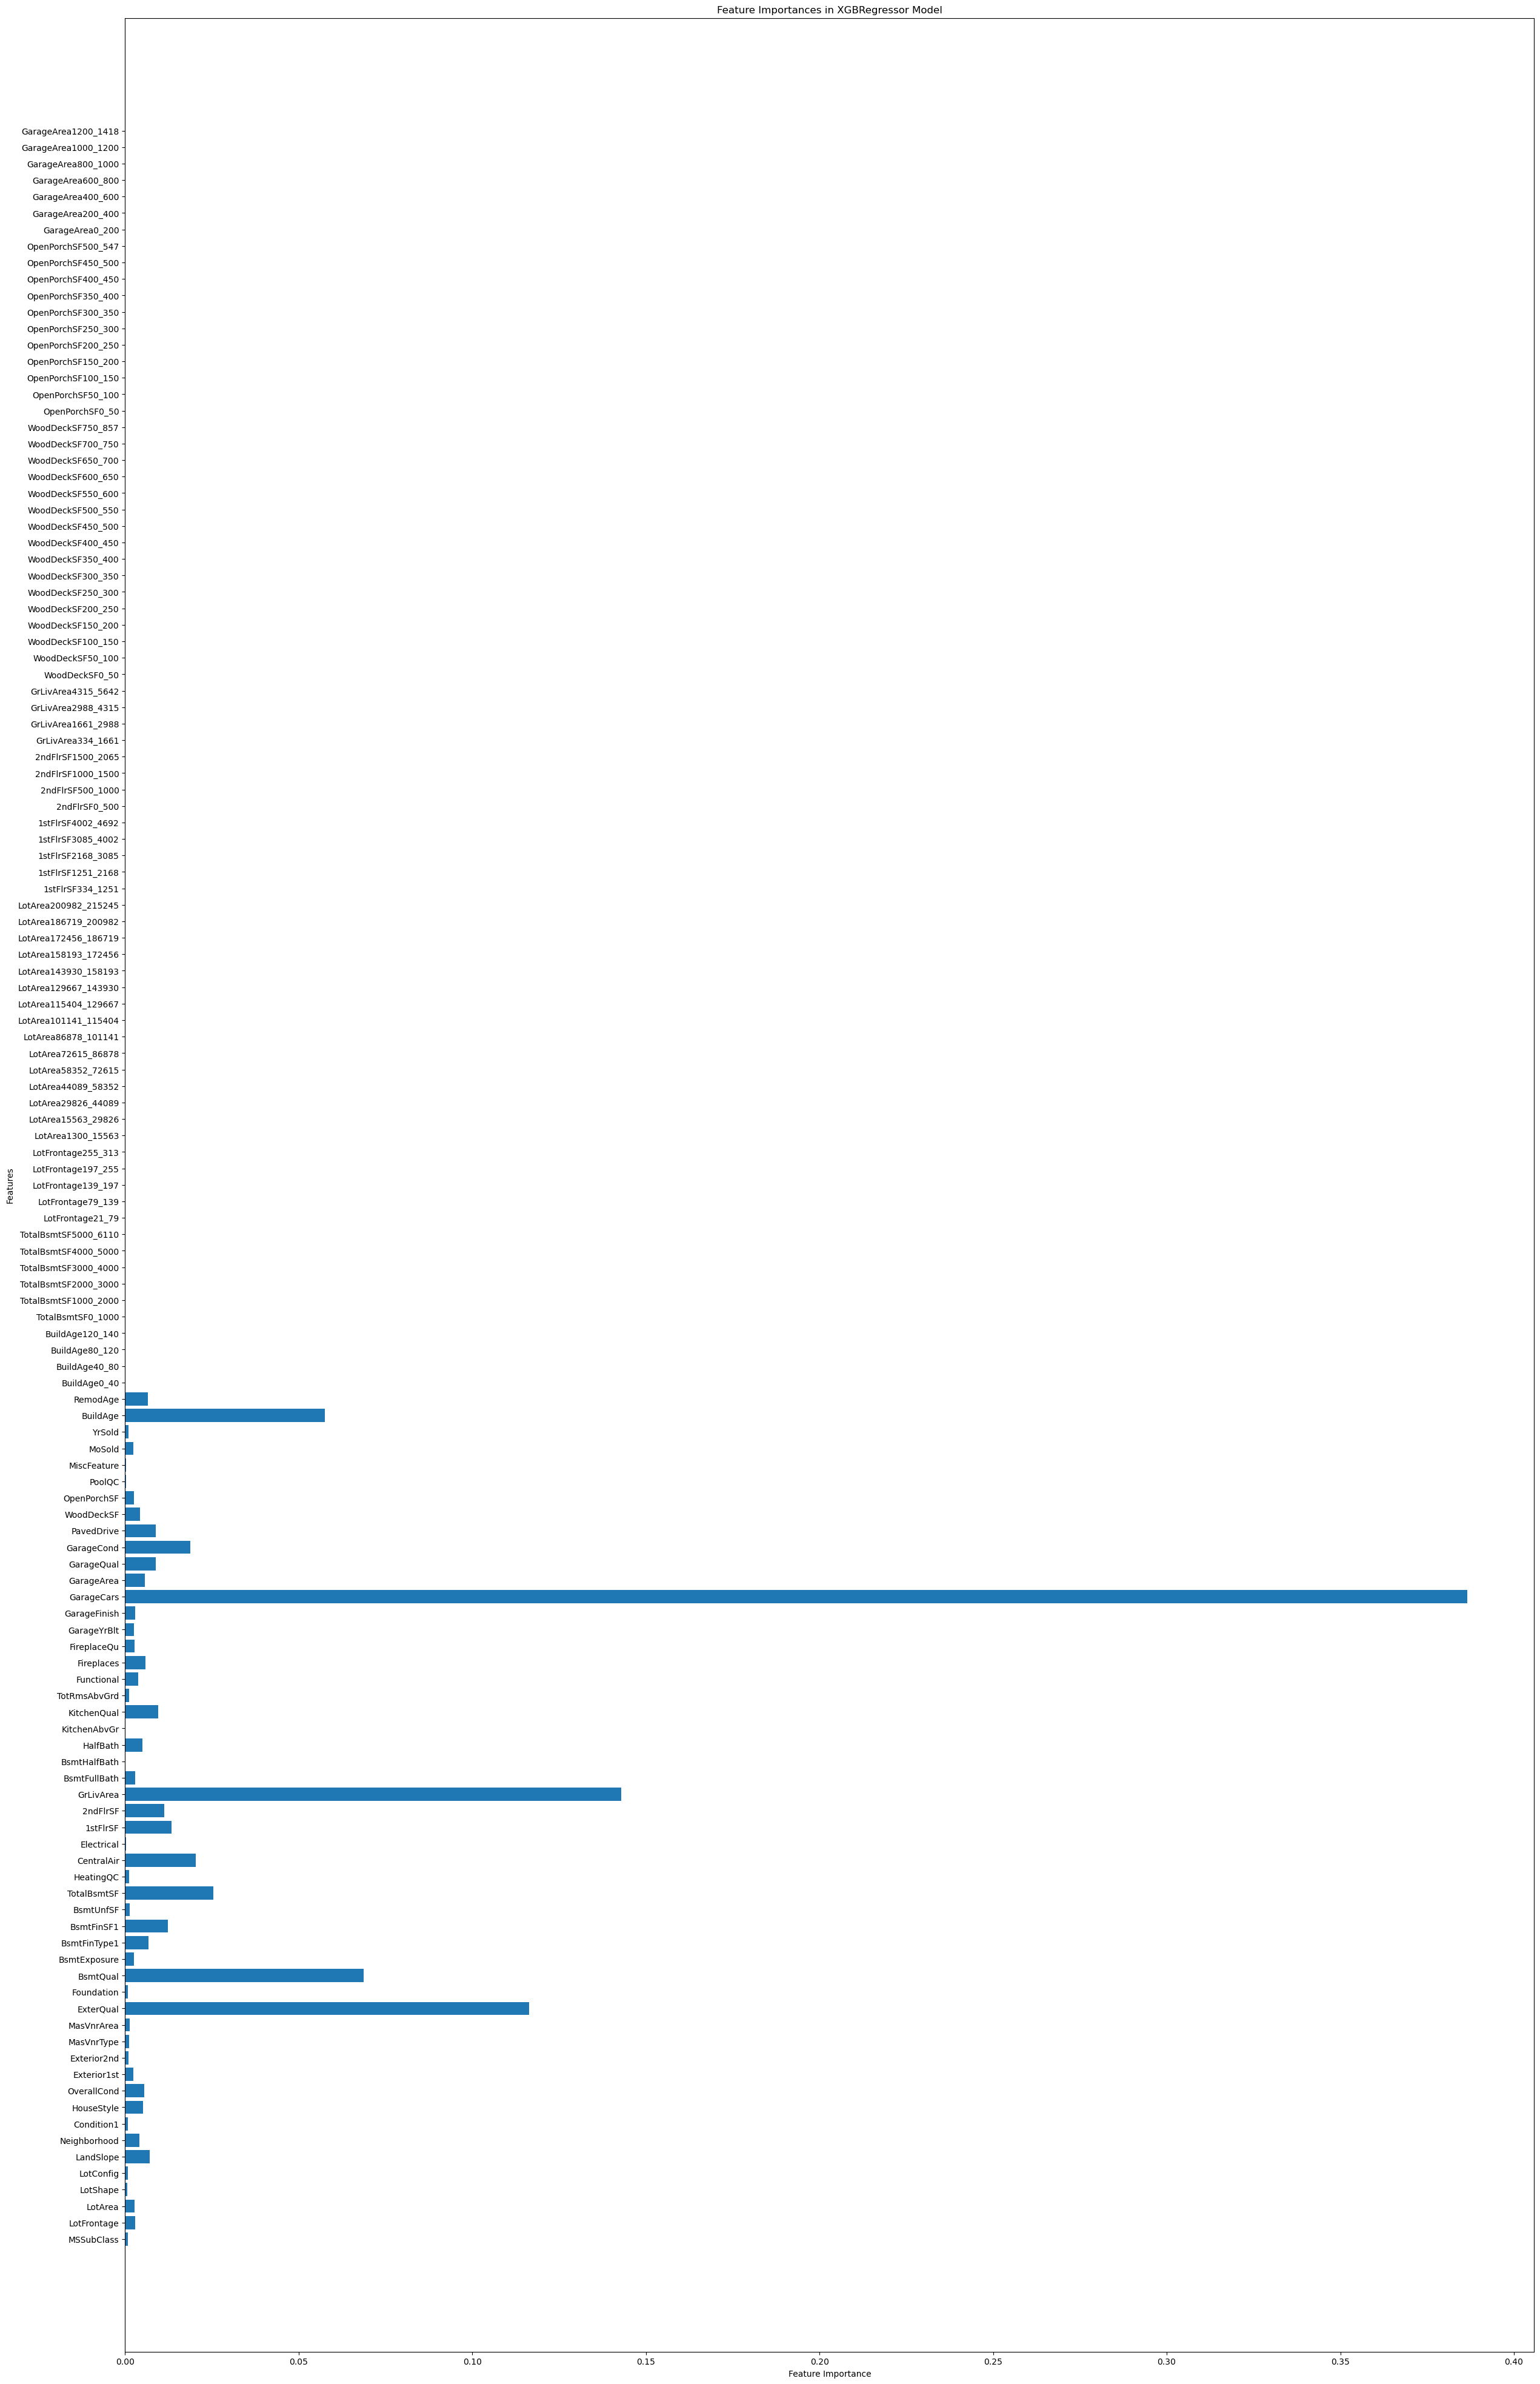

<Figure size 3000x10000 with 0 Axes>

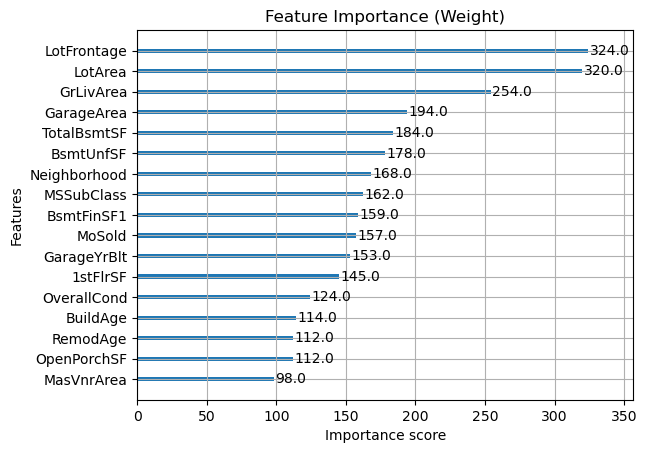

<Figure size 3000x10000 with 0 Axes>

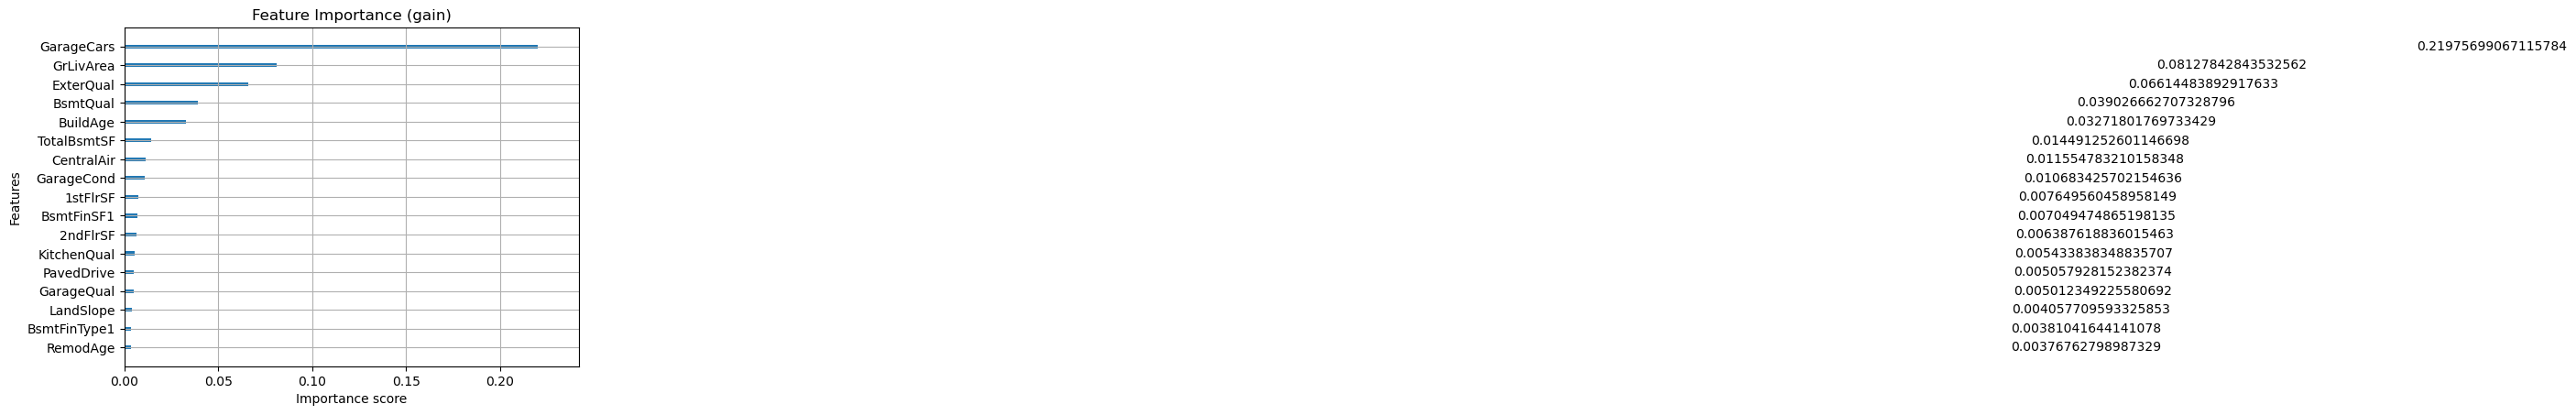

<Figure size 3000x10000 with 0 Axes>

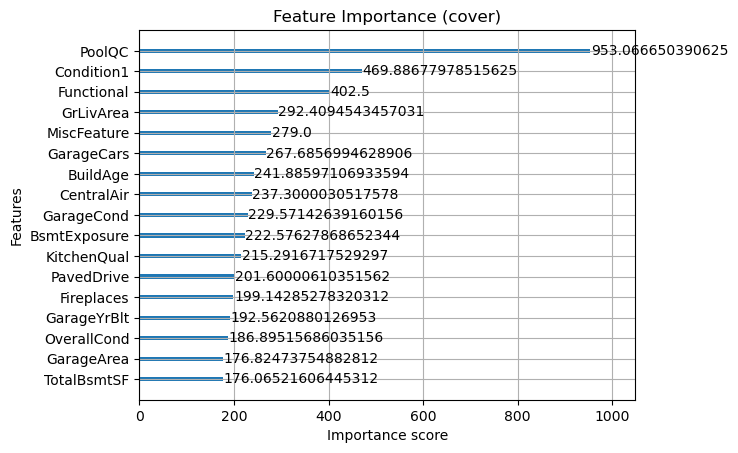

ValueError: not enough values to unpack (expected 2, got 1)

In [48]:
feature_names = test_X.columns

# 8. Plot feature importances

# Get raw feature importances
raw_importances = XGBmodel.feature_importances_

print(train_X.columns)


# Normalize the importances (divide by the sum of all importances)
normalized_importances = raw_importances / raw_importances.sum()

plt.figure(figsize=(30, 50))
plt.barh(range(len(normalized_importances)), normalized_importances)
plt.yticks(range(len(normalized_importances)), train_X.columns)  # Set y-ticks to feature names
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances in XGBRegressor Model")
plt.show()
#This importance is based on the total amount of information each feature contributed to the model’s performance. 
#Specifically, it is calculated as the sum of the improvement brought by each feature to the splits in all trees.



#Plot feature importance using plot_importance, which is normalized data 
plt.figure(figsize=(30, 100))
plot_importance(XGBmodel, importance_type='weight', max_num_features=17, title="Feature Importance (Weight)")
plt.show()


#Plot feature importance using plot_importance, which is normalized data (GAIN)
plt.figure(figsize=(30, 100))
plot_importance(XGBmodel, importance_type='gain', max_num_features=17, title="Feature Importance (gain)")
plt.show()

#Plot feature importance using plot_importance, which is normalized data (GAIN)
plt.figure(figsize=(30, 100))
plot_importance(XGBmodel, importance_type='cover', max_num_features=17, title="Feature Importance (cover)")
plt.show()

#Extract the feature importances manually (for further analysis)
importances = XGBmodel.feature_importances_
for i, features in enumerate[feature_names]:
    print(features, " importance (weight):", importances[count2])
    

In [ ]:
!pip install xgboost
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#train_data.drop(['LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscFeature', 'MiscVal', 'YearBuilt1872_1908', 'YearBuilt1988_2010', 'TotalBsmtSF0_1000', 'TotalBsmtSF2000_3000', 'TotalBsmtSF3000_4000', 'TotalBsmtSF4000_5000', 'TotalBsmtSF5000_6110', 'LotFrontage21_79', 'LotFrontage79_139', 'LotFrontage139_197', 'LotFrontage197_255', 'LotFrontage255_313', 'LotArea1300_15563', 'LotArea15563_29826', 'LotArea44089_58352', 'LotArea58352_72615', 'LotArea72615_86878', 'LotArea86878_101141', 'LotArea101141_115404', 'LotArea115404_129667', 'LotArea129667_143930', 'LotArea143930_158193', 'LotArea158193_172456', 'LotArea172456_186719', 'LotArea186719_200982', 'LotArea200982_215245', '1stFlrSF334_1251', '1stFlrSF2168_3085', '1stFlrSF3085_4002', '1stFlrSF4002_4692', '2ndFlrSF0_500', '2ndFlrSF1500_2065', 'GrLivArea334_1661', 'GrLivArea1661_2988', 'GrLivArea2988_4315', 'GrLivArea4315_5642', 'WoodDeckSF0_50', 'WoodDeckSF300_350', 'WoodDeckSF400_450', 'WoodDeckSF450_500', 'WoodDeckSF500_550', 'WoodDeckSF550_600', 'WoodDeckSF600_650', 'WoodDeckSF650_700', 'WoodDeckSF700_750', 'WoodDeckSF750_857', 'OpenPorchSF0_50', 'OpenPorchSF150_200', 'OpenPorchSF250_300', 'OpenPorchSF300_350', 'OpenPorchSF350_400', 'OpenPorchSF400_450', 'OpenPorchSF450_500', 'OpenPorchSF500_547', 'GarageArea0_200', 'GarageArea200_400', 'GarageArea1000_1200', 'GarageArea1200_1418'], axis=1)
#test_data.drop(['LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscFeature', 'MiscVal', 'YearBuilt1872_1908', 'YearBuilt1988_2010', 'TotalBsmtSF0_1000', 'TotalBsmtSF2000_3000', 'TotalBsmtSF3000_4000', 'TotalBsmtSF4000_5000', 'TotalBsmtSF5000_6110', 'LotFrontage21_79', 'LotFrontage79_139', 'LotFrontage139_197', 'LotFrontage197_255', 'LotFrontage255_313', 'LotArea1300_15563', 'LotArea15563_29826', 'LotArea44089_58352', 'LotArea58352_72615', 'LotArea72615_86878', 'LotArea86878_101141', 'LotArea101141_115404', 'LotArea115404_129667', 'LotArea129667_143930', 'LotArea143930_158193', 'LotArea158193_172456', 'LotArea172456_186719', 'LotArea186719_200982', 'LotArea200982_215245', '1stFlrSF334_1251', '1stFlrSF2168_3085', '1stFlrSF3085_4002', '1stFlrSF4002_4692', '2ndFlrSF0_500', '2ndFlrSF1500_2065', 'GrLivArea334_1661', 'GrLivArea1661_2988', 'GrLivArea2988_4315', 'GrLivArea4315_5642', 'WoodDeckSF0_50', 'WoodDeckSF300_350', 'WoodDeckSF400_450', 'WoodDeckSF450_500', 'WoodDeckSF500_550', 'WoodDeckSF550_600', 'WoodDeckSF600_650', 'WoodDeckSF650_700', 'WoodDeckSF700_750', 'WoodDeckSF750_857', 'OpenPorchSF0_50', 'OpenPorchSF150_200', 'OpenPorchSF250_300', 'OpenPorchSF300_350', 'OpenPorchSF350_400', 'OpenPorchSF400_450', 'OpenPorchSF450_500', 'OpenPorchSF500_547', 'GarageArea0_200', 'GarageArea200_400', 'GarageArea1000_1200', 'GarageArea1200_1418'], axis=1)

X = train_data[Inputs]
y = train_data[Output].values.ravel()

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=.2, random_state=38)

XGBmodel = XGBRegressor(objective='reg:squarederror', eta = 0.1, random_state=42)


#scale data
scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.transform(test_X)


# 5. Make predictions on the test data
XGBmodel.fit(train_X, train_y)
y_pred = XGBmodel.predict(test_X)


# 6. Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(test_y, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# 7. Optionally, you can also calculate R-squared (R²) to evaluate the model fit
r2 = XGBmodel.score(test_X, test_y)
print(f"R-squared: {r2:.4f}")

# Step 6: Plot true values vs. predicted values (for R² visualization)
plt.figure(figsize=(8, 6))
plt.scatter(test_y, y_pred, color='blue', alpha=0.5, label='Predicted vs. True')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'R² = {r2:.4f}')
plt.legend()
plt.show()

feature_names = test_X.columns

# 8. Plot feature importances

# Get raw feature importances
raw_importances = XGBmodel.feature_importances_

# Normalize the importances (divide by the sum of all importances)
normalized_importances = raw_importances / raw_importances.sum()

plt.figure(figsize=(30, 20))
plt.barh(range(len(normalized_importances)), normalized_importances)
plt.yticks(range(len(normalized_importances)), train_X.columns)  # Set y-ticks to feature names
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances in XGBRegressor Model")
plt.show()
#This importance is based on the total amount of information each feature contributed to the model’s performance. 
#Specifically, it is calculated as the sum of the improvement brought by each feature to the splits in all trees.



#Plot feature importance using plot_importance, which is normalized data 
plt.figure(figsize=(30, 100))
plot_importance(XGBmodel, importance_type='weight', max_num_features=17, title="Feature Importance (Weight)")
plt.show()


#Plot feature importance using plot_importance, which is normalized data (GAIN)
plt.figure(figsize=(30, 100))
plot_importance(XGBmodel, importance_type='gain', max_num_features=17, title="Feature Importance (gain)")
plt.show()

#Plot feature importance using plot_importance, which is normalized data (GAIN)
plt.figure(figsize=(30, 100))
plot_importance(XGBmodel, importance_type='cover', max_num_features=17, title="Feature Importance (cover)")
plt.show()

#Extract the feature importances manually (for further analysis)
importances = XGBmodel.feature_importances_
toRemove = []
for i, features in enumerate(feature_names):
    if importances[i] == 0:
        print(features, " importance (weight):", importances[i])
        toRemove.append(features)

print(toRemove)


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Plot the correlation matrix
# Create a DataFrame with your features
df = pd.DataFrame(train_X, columns=[f"Feature {i}" for i in range(train_X.shape[1])])
corr_matrix = df.corr()
plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
#-----------------------------------------------------------------
#Better heatmap
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)

# Convert train_X_scaled (numpy array) into a DataFrame with proper column names
df = pd.DataFrame(train_X_scaled, columns=train_X.columns)

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
#-------------------------------------------------------------------
#feature distribution
feature_index = 16
feature_name = train_X.columns[feature_index]  # Get the column name

#feature_index = 16 is Overall Quality feature

# Plot the distribution of the feature

plt.figure(figsize=(10, 6))
plt.hist(train_X[feature_name], bins=50, color='blue', alpha=0.7)
plt.title(f"Distribution of {feature_name} Values")
plt.xlabel(f"{feature_name}")
plt.ylabel("Frequency")
plt.show()
print("done")